<h1>1. Đọc và import các thư viện cần thiết

<h3>Import các thư viện cần thiết

In [1]:
%pylab inline
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler  
from sklearn.svm import SVC   
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<h3>- Đọc dữ liệu

In [2]:
df = pd.read_csv('movies.csv')

<h3>- Kiểm tra dữ liệu đã đọc

In [3]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

<h3>- Thống kê các thuộc tính của dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


<h3>- Thống kê có cột dữ liệu nào có giá trị null không

In [5]:
print("Shape of data: ", df.shape)
print("Duplicated rows: ", df.duplicated(keep=False).sum())
print("-" * 40)
print("Missing values count:\n", df.isnull().sum())
print("-" * 40)
print("If drop all NAs: ", df.dropna().shape)

Shape of data:  (7668, 15)
Duplicated rows:  0
----------------------------------------
Missing values count:
 name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64
----------------------------------------
If drop all NAs:  (5421, 15)


<li>Tập dữ liệu chứa 7668 hàng và 15 cột.
<li>Trong đó có 5421 dòng dữ liệu không có giá trị NA.
<li>Dataset không chứa các dòng dữ liệu trùng lặp.
<p>2 thuộc tính "budget" và "gross" dùng để xét xem bộ phim đó có thành công hay không? Vì vậy cần loại bỏ các giá trị NA để đảm bảo độ chính xác khi quyết định sự thành công của bộ phim. (5421 dòng dữ liệu sau khi đã loại bỏ các giá trị NA vẫn đủ để thực hiện)

<h3>- Thống kê mô tả dữ liệu

In [6]:
df.describe()

year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000

<h1>2. Tiền xử lý dữ liệu

<li>Loại bỏ các giá trị NA

In [7]:
df = df.dropna()

<li>Kiểm tra lại các dòng dữ liệu sau khi loại bỏ các giá trị NA

In [8]:
print("Shape of data: ", df.shape)
print("Duplicated rows: ", df.duplicated(keep=False).sum())
print("-" * 40)
print("Missing values count:\n", df.isnull().sum())

Shape of data:  (5421, 15)
Duplicated rows:  0
----------------------------------------
Missing values count:
 name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


<h3>- Tiến hành thêm 1 thuộc tính "success" để xem xét bộ phim đó có thành công hay không.

In [9]:
df['success'] = df.apply(lambda row: 1 if row["gross"] > row["budget"] else 0, axis = 1)
df.success.value_counts()

C:\Users\Luc\AppData\Local\Temp\ipykernel_17952\3629765724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['success'] = df.apply(lambda row: 1 if row["gross"] > row["budget"] else 0, axis = 1)


1    3677
0    1744
Name: success, dtype: int64

In [10]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country       budget        gross  \
0     United Kingdom   19000000.0   46998772.0   
1      United States    4500000.0   58853106.0   
2      United States   18000000.0  538375067.0   
3      United States    3500000.0   83453539.0   
4      United States    6000000.0   39846344.0   
...              ...          ...          ...   
7648   United States   90000000.0  426505244.0   
7649   United States   85000000.0  319715683.0   
7650   United States  175000000.0  245487753.0   
7651          Canada  135000000.0  111105497.0   
7652           China   80000000.0  461421559.0   

                                  company  runtime  success  
0                            Warner Bros.    146.0        1  
1                       Columbia Pictures    104.0        1  
2                               Lucasfilm    124.0        1  
3                      Paramount Pictures     88.0        1  
4                          Orion Pictures     98.0        1  
...                                   ...      ...      ...  
7648                    Columbia Pictures    124.0        1  
7649                   Paramount Pictures     99.0        1  
7650                   Universal Pictures    101.0        1  
7651                 20th Century Studios    100.0        0  
7652  Beijing Diqi Yinxiang Entertainment    149.0        1  

[5421 rows x 16 columns]

Kiểm tra xem có bao nhiêu giá trị trong cột 'realeased' không có ngày tháng đầy đủ

In [11]:
# how many values are in the 'released' column, that doesn't have a full date?
df['released'].apply(lambda x: len(x.split('(')[0].split()) != 3).sum()

14

Ta sẽ xóa những dòng này

In [12]:
df.drop(df[df['released'].apply(lambda x: len(x.split('(')[0].split()))!= 3].index, inplace=True)
df['released'].apply(lambda x: len(x.split('(')[0].split()) != 3).sum()

C:\Users\Luc\AppData\Local\Temp\ipykernel_17952\2192329461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['released'].apply(lambda x: len(x.split('(')[0].split()))!= 3].index, inplace=True)


0

Chuyển đổi cột 'released' thành ngày, tháng, năm

In [13]:
df['released'] = df['released'].apply(lambda x: x.split('(')[0])
df['released'] = pd.to_datetime(df['released'])

df['month'] = df['released'].dt.month
df['day'] = df['released'].dt.day

C:\Users\Luc\AppData\Local\Temp\ipykernel_17952\2051738166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['released'] = df['released'].apply(lambda x: x.split('(')[0])
C:\Users\Luc\AppData\Local\Temp\ipykernel_17952\2051738166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['released'] = pd.to_datetime(df['released'])
C:\Users\Luc\AppData\Local\Temp\ipykernel_17952\2051738166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

Đặt lại các cột

In [14]:
df = df[['name', 'rating', 'genre', 'released', 'year', 'month', 'day'
                          , 'score', 'votes', 'director', 'writer', 'star',
                          'country', 'budget', 'gross', 'company', 'runtime', 'success']].copy()
df.head()

name rating      genre  \
0                                     The Shining      R      Drama   
1                                 The Blue Lagoon      R  Adventure   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action   
3                                       Airplane!     PG     Comedy   
4                                      Caddyshack      R     Comedy   

    released  year  month  day  score      votes         director  \
0 1980-06-13  1980      6   13    8.4   927000.0  Stanley Kubrick   
1 1980-07-02  1980      7    2    5.8    65000.0   Randal Kleiser   
2 1980-06-20  1980      6   20    8.7  1200000.0   Irvin Kershner   
3 1980-07-02  1980      7    2    7.7   221000.0     Jim Abrahams   
4 1980-07-25  1980      7   25    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  success  
0   46998772.0        Warner Bros.    146.0        1  
1   58853106.0   Columbia Pictures    104.0        1  
2  538375067.0           Lucasfilm    124.0        1  
3   83453539.0  Paramount Pictures     88.0        1  
4   39846344.0      Orion Pictures     98.0        1

Xem xét các dữ liệu số

In [15]:
df.describe().T

count          mean           std     min         25%         50%  \
year     5407.0  2.001690e+03  1.053266e+01  1980.0      1993.0      2002.0   
month    5407.0  6.661920e+00  3.463247e+00     1.0         4.0         7.0   
day      5407.0  1.610264e+01  8.489314e+00     1.0         9.0        16.0   
score    5407.0  6.393194e+00  9.627553e-01     1.9         5.8         6.5   
votes    5407.0  1.153467e+05  1.845629e+05   195.0     19000.0     52000.0   
budget   5407.0  3.608856e+07  4.159678e+07  6000.0  10000000.0  22000000.0   
gross    5407.0  1.034955e+08  1.874721e+08   309.0  10852339.5  37295445.0   
runtime  5407.0  1.081696e+02  1.812290e+01    63.0        95.0       105.0   
success  5407.0  6.796745e-01  4.666448e-01     0.0         0.0         1.0   

                 75%           max  
year          2011.0  2.020000e+03  
month           10.0  1.200000e+01  
day             23.0  3.100000e+01  
score            7.1  9.300000e+00  
votes       130000.0  2.400000e+06  
budget    45000000.0  3.560000e+08  
gross    113042381.0  2.847246e+09  
runtime        118.0  2.710000e+02  
success          1.0  1.000000e+00

Xem xét các dữ liệu object

In [16]:
df.describe(include='object')

name rating   genre     director       writer          star  \
count       5407   5407    5407         5407         5407          5407   
unique      5322     10      15         2058         3198          1838   
top     Hercules      R  Comedy  Woody Allen  Woody Allen  Nicolas Cage   
freq           3   2587    1494           33           32            40   

              country             company  
count            5407                5407  
unique             50                1469  
top     United States  Universal Pictures  
freq             4310                 330

Các cột 'director', 'writer', 'star', 'company' có quá nhiều giá trị duy nhất, nếu sử dụng các dữ liệu này ta sẽ rất khó phân tích, vì vậy chúng ta sẽ biến đổi các cột này.

In [17]:
# chia các cột dữ liệu vào các biến theo phân loại dữ liệu
float_cols = df.drop('name', axis=1).dtypes[df.dtypes == 'float64'].index.tolist()
int_cols = df.drop('name', axis=1).dtypes[df.dtypes == 'int64'].index.tolist()
cat_cols = df.drop('name', axis=1).dtypes[df.dtypes == 'object'].index.tolist()
num_cols = float_cols + int_cols
binary = [x for x in num_cols if len(df[x].unique()) == 2]
num_not_binary = [x for x in num_cols if x not in binary]

print("Numerical variables: ", num_cols)
print("Numerical continuous variables: ", float_cols)
print("Numerical discrete variables: ", int_cols)
print("Numerical and not binary variables: ", num_not_binary)
print("Binary variables: ", binary)
print("Categorical variables: ", cat_cols)

Numerical variables:  ['score', 'votes', 'budget', 'gross', 'runtime', 'year', 'month', 'day', 'success']
Numerical continuous variables:  ['score', 'votes', 'budget', 'gross', 'runtime']
Numerical discrete variables:  ['year', 'month', 'day', 'success']
Numerical and not binary variables:  ['score', 'votes', 'budget', 'gross', 'runtime', 'year', 'month', 'day']
Binary variables:  ['success']
Categorical variables:  ['rating', 'genre', 'director', 'writer', 'star', 'country', 'company']


<h3>Làm sạch dữ liệu

Vẽ biểu đồ plots cho các dữ liệu không phải số

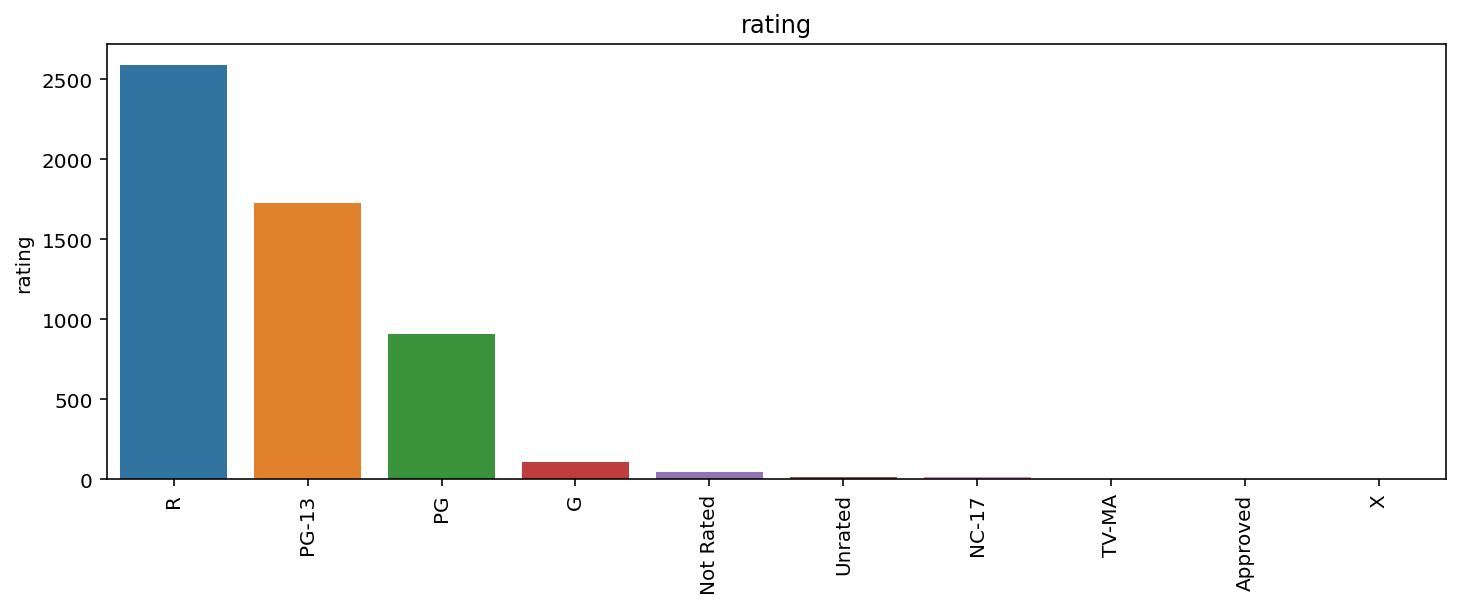

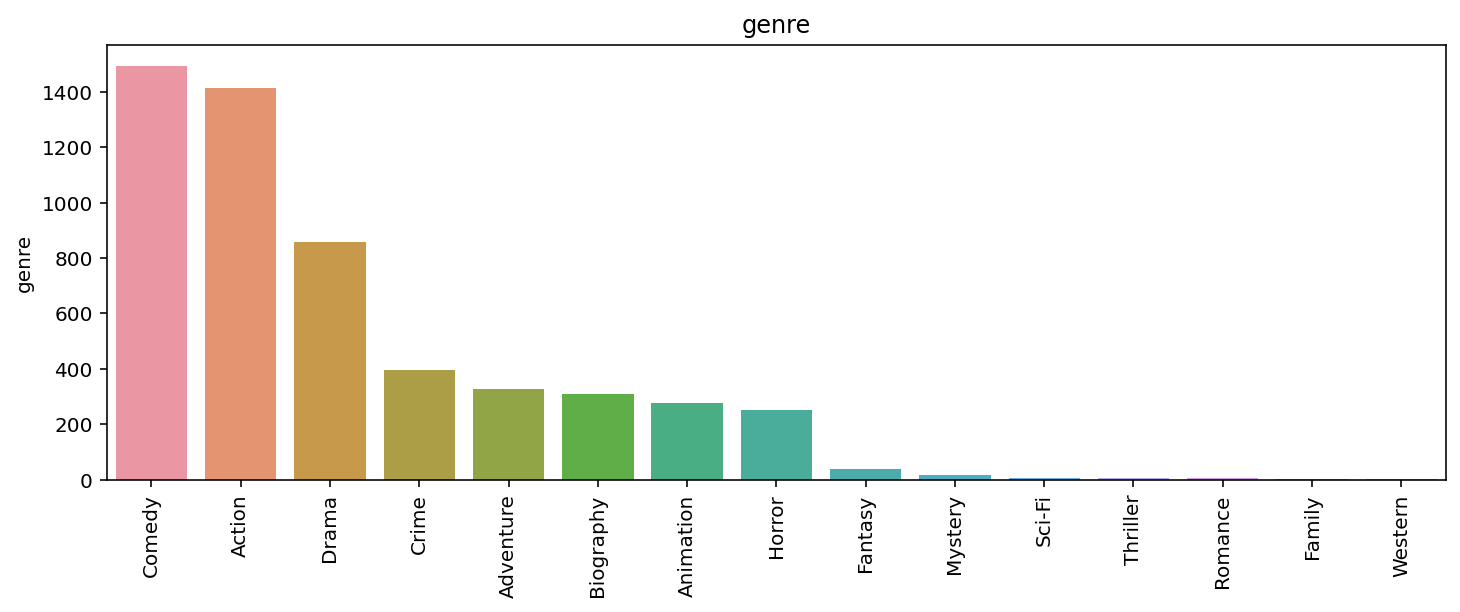

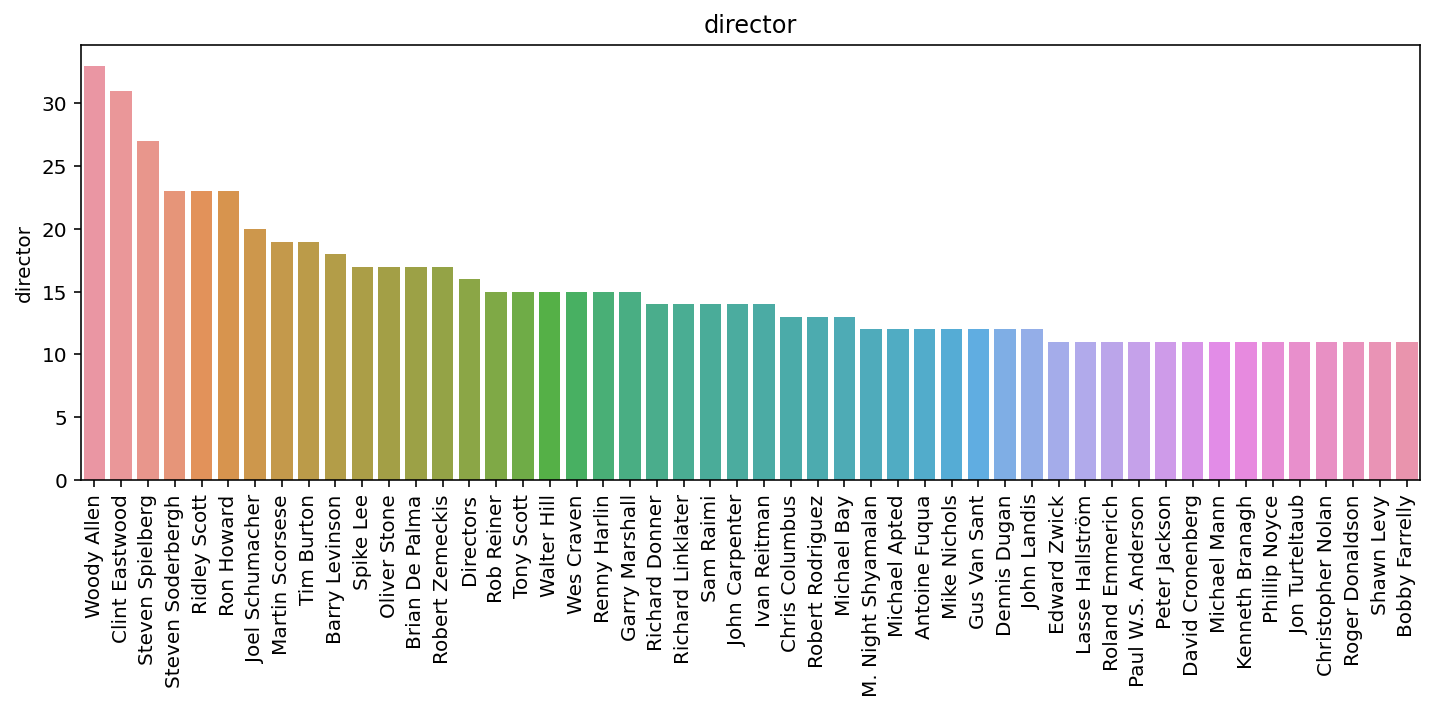

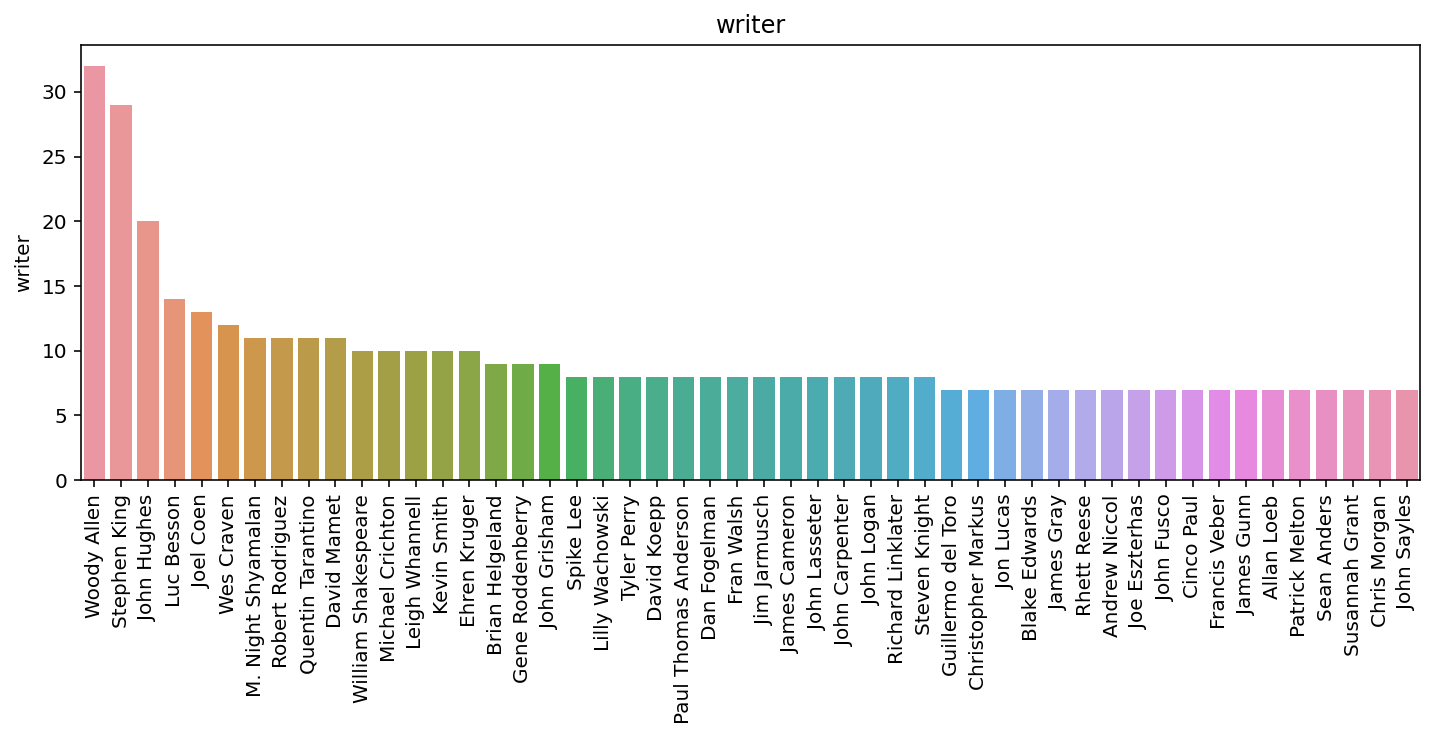

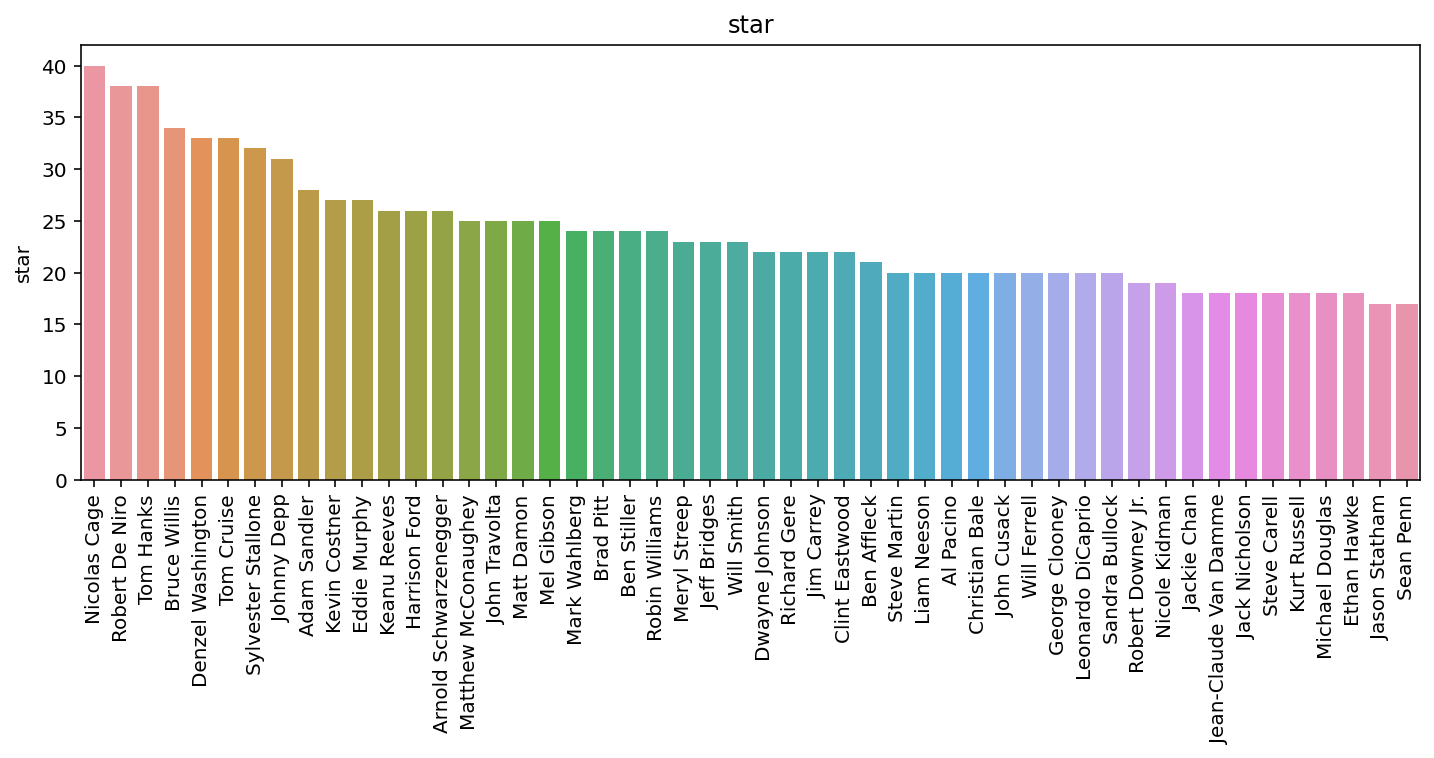

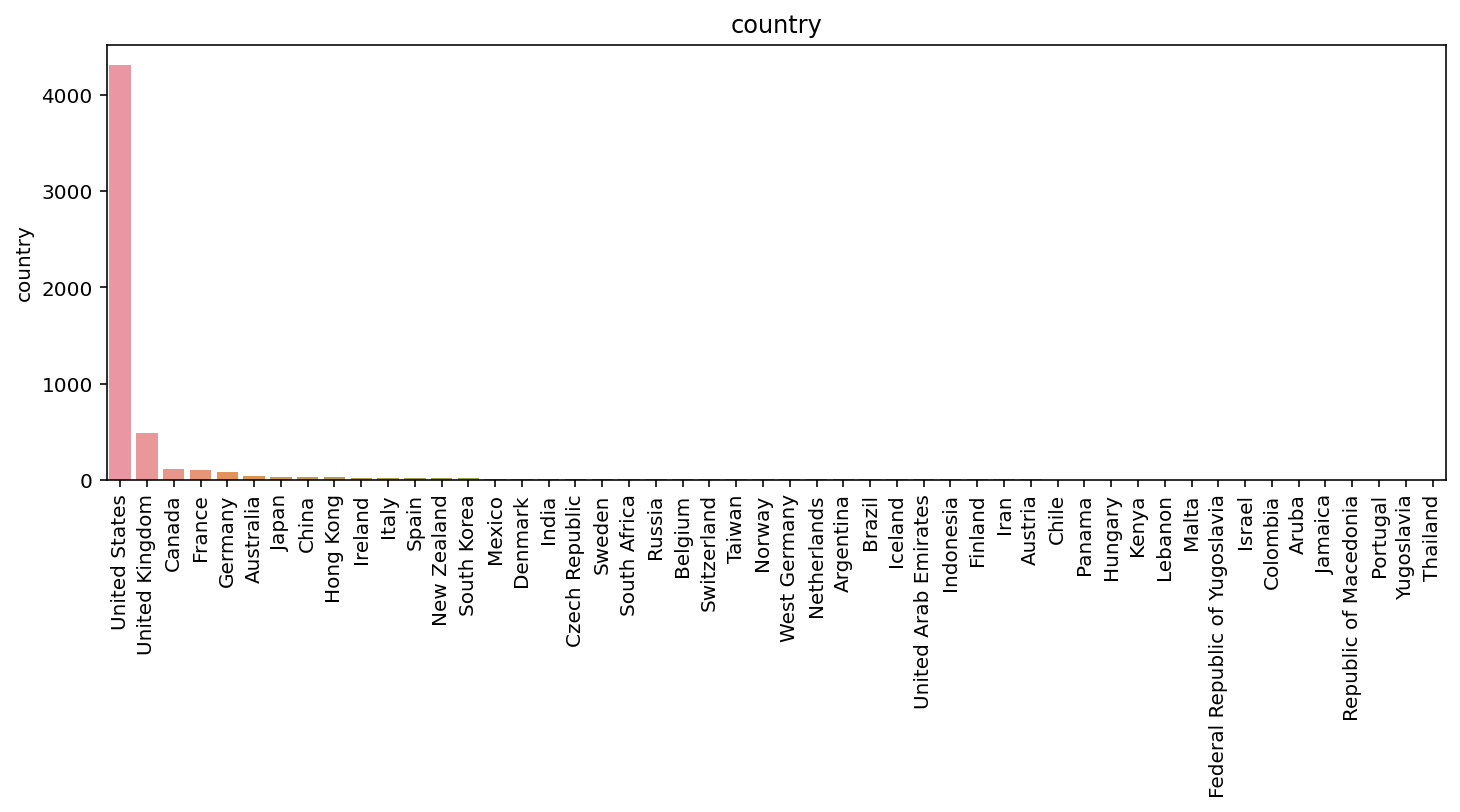

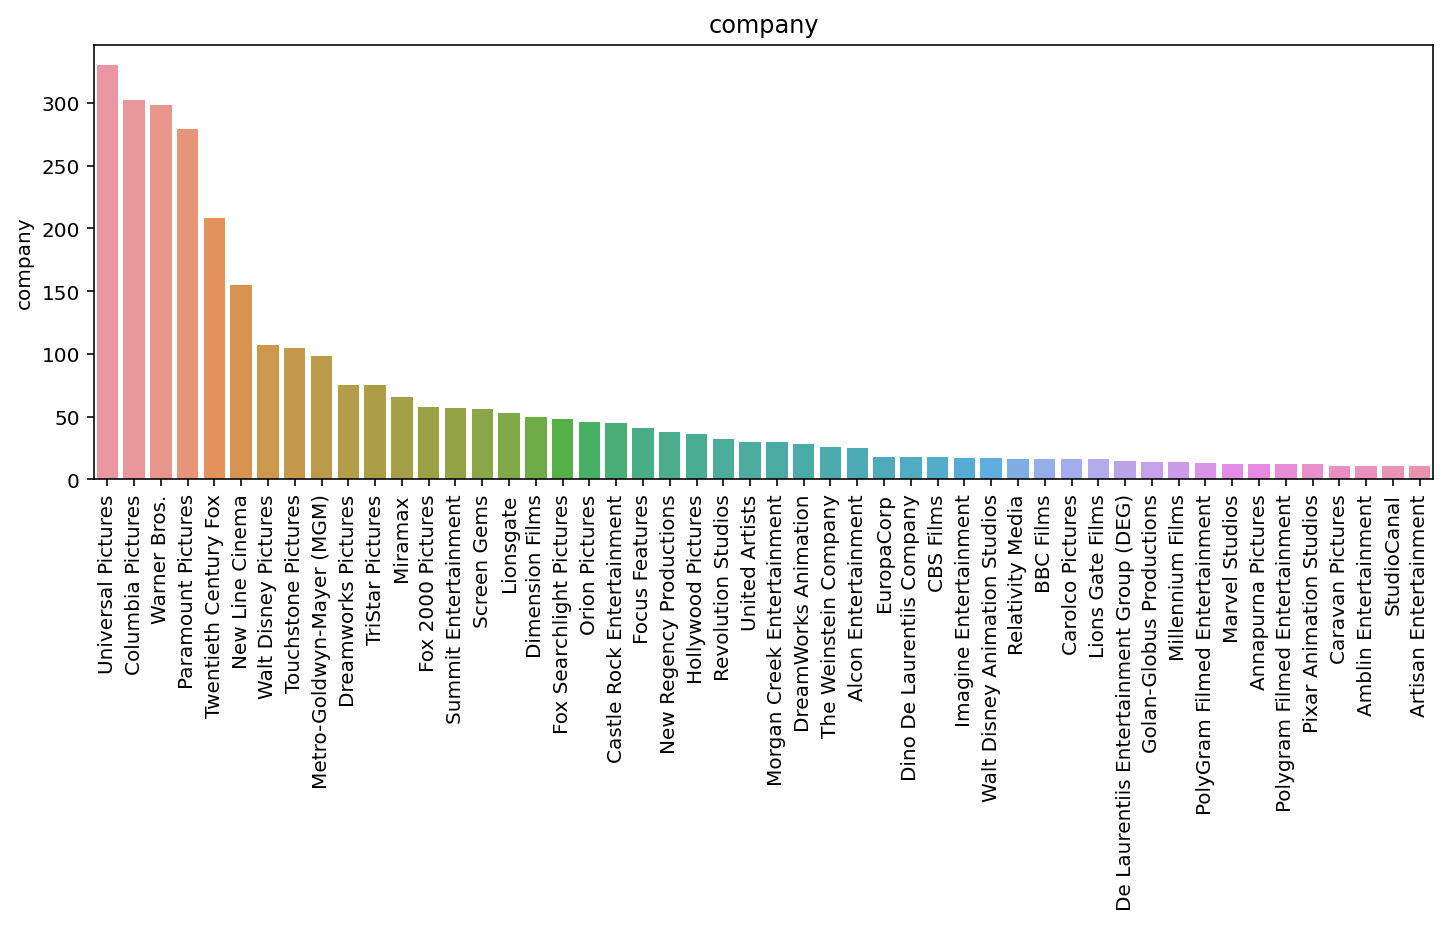

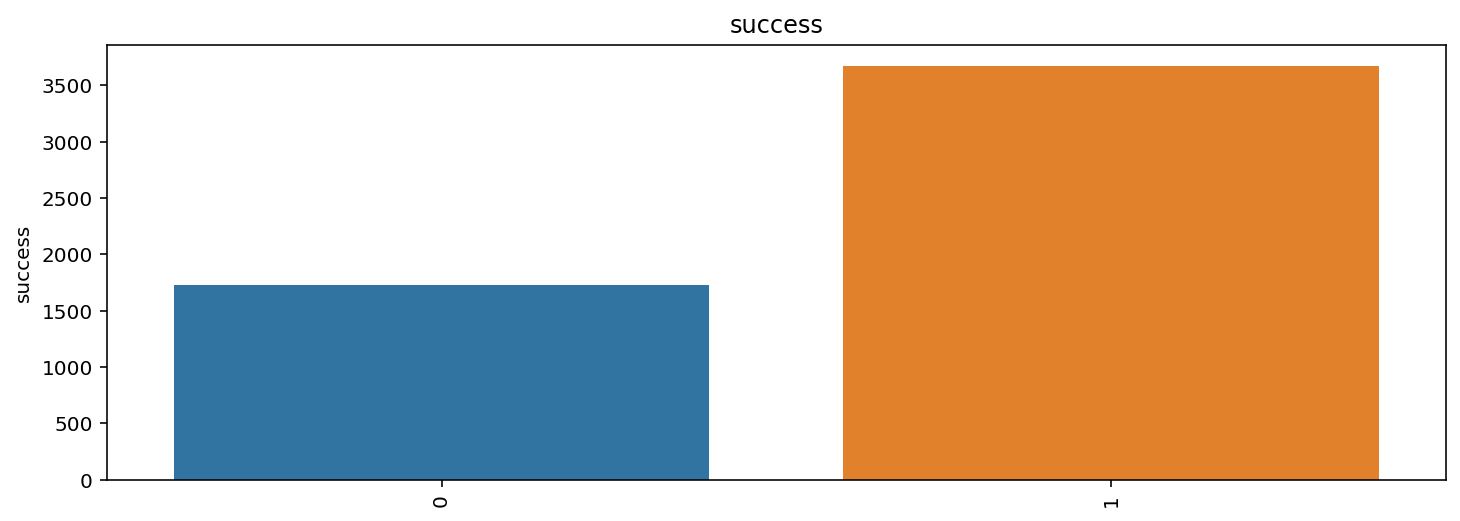

In [18]:
for i in cat_cols + binary:
    plt.figure(figsize = (12,4))
    sns.barplot(x = df[i].value_counts().index[0:50], 
                y = df[i].value_counts()[0:50]).set_title(i)
    plt.xticks(rotation='vertical')
    plt.show()

Xem xét cột rating

In [19]:
pd.pivot_table(df, index = 'success', columns = 'rating', values = 'name', aggfunc ='count')

rating   Approved     G  NC-17  Not Rated     PG   PG-13       R  TV-MA  \
success                                                                   
0             NaN  24.0    5.0       25.0  248.0   459.0   965.0    1.0   
1             1.0  87.0    7.0       18.0  657.0  1270.0  1622.0    1.0   

rating   Unrated    X  
success                
0            5.0  NaN  
1           11.0  1.0

Ta thấy các dữ liệu có sự tương đồng như: Unrated - Not Rated; X - NC-17; Approved - PG-13; TV-MA - NC-17; Vì vậy ta sẽ gộp các dữ liệu này lại

In [20]:
# combine some minor classes
to_replace = {'TV-MA': 'NC-17',
              'X': 'NC-17',
              'Unrated': 'Not Rated',
              'Approved': 'PG-13'}
df['rating'] = df['rating'].replace(to_replace = to_replace)
df['rating'].value_counts(normalize=True)

R            0.478454
PG-13        0.319956
PG           0.167376
G            0.020529
Not Rated    0.010912
NC-17        0.002774
Name: rating, dtype: float64

Xem xét cột genre

In [21]:
pd.pivot_table(df, index = 'success', columns = 'genre', values = 'name', aggfunc ='count')

genre    Action  Adventure  Animation  Biography  Comedy  Crime  Drama  \
success                                                                  
0         384.0      112.0       43.0      110.0   494.0  173.0  340.0   
1        1030.0      215.0      234.0      200.0  1000.0  223.0  519.0   

genre    Family  Fantasy  Horror  Mystery  Romance  Sci-Fi  Thriller  Western  
success                                                                        
0           2.0     11.0    50.0      5.0      3.0     4.0       NaN      1.0  
1           2.0     29.0   201.0     11.0      2.0     2.0       6.0      1.0

In [22]:
count_genre = df['genre'].value_counts()
count_genre

Comedy       1494
Action       1414
Drama         859
Crime         396
Adventure     327
Biography     310
Animation     277
Horror        251
Fantasy        40
Mystery        16
Sci-Fi          6
Thriller        6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

Ta thấy cột genre có nhiều thể loại chỉ có vài bộ phim vì vậy ta sẽ gộp các thể loại có dưới 10 bộ phim thành 1 thể loại mới là Other

In [23]:
# Tạo danh sách chứa các thể loại chính( có hơn 10 bộ phim )
main_genres = []
for i in range(len(count_genre)):
    if count_genre[i] > 10:
        main_genres.append(count_genre.index[i])
main_genres

['Comedy',
 'Action',
 'Drama',
 'Crime',
 'Adventure',
 'Biography',
 'Animation',
 'Horror',
 'Fantasy',
 'Mystery']

In [24]:
# Đưa tất cả các thể loại còn lại vào Other
df['genre'] = df['genre'].apply(lambda x: 'Other' if x not in main_genres else x)
print(df['genre'].value_counts(normalize=True))
pd.pivot_table(df, index = 'success', columns = 'genre', values = 'name', aggfunc ='count')

Comedy       0.276308
Action       0.261513
Drama        0.158868
Crime        0.073238
Adventure    0.060477
Biography    0.057333
Animation    0.051230
Horror       0.046421
Fantasy      0.007398
Other        0.004254
Mystery      0.002959
Name: genre, dtype: float64


genre    Action  Adventure  Animation  Biography  Comedy  Crime  Drama  \
success                                                                  
0           384        112         43        110     494    173    340   
1          1030        215        234        200    1000    223    519   

genre    Fantasy  Horror  Mystery  Other  
success                                   
0             11      50        5     10  
1             29     201       11     13

Xem xét cột country

In [25]:
count_country = df['country'].value_counts().head(20)
count_country

United States     4310
United Kingdom     490
Canada             111
France             104
Germany             82
Australia           42
Japan               28
China               26
Hong Kong           24
Ireland             21
Italy               19
Spain               18
New Zealand         18
South Korea         13
Mexico              10
Denmark             10
India                8
Czech Republic       7
Sweden               5
South Africa         4
Name: country, dtype: int64

Tương tự như thuộc tính genre ta cũng sẽ đưa những nước có dưới 25 bộ phim thành nước Other

In [26]:
# Tạo danh sách các nước có trên 25 bộ phim
main_countries = []
for i in range(len(count_country)):
    if count_country[i] > 25:
        main_countries.append(count_country.index[i])
main_countries

['United States',
 'United Kingdom',
 'Canada',
 'France',
 'Germany',
 'Australia',
 'Japan',
 'China']

In [27]:
# Đưa các nước còn lại vào Other
df['country'] = df['country'].apply(lambda x: 'Other' if x not in main_countries else x)
pd.pivot_table(df, index = 'success', columns = 'country', values = 'name' ,aggfunc ='count')

country  Australia  Canada  China  France  Germany  Japan  Other  \
success                                                            
0               15      57      3      48       40      8     74   
1               27      54     23      56       42     20    140   

country  United Kingdom  United States  
success                                 
0                   194           1293  
1                   296           3017

Xem xét các cột 'Director', 'writer', 'star', 'company'. Như đã nói ở trên chúng ta sẽ xử lí dữ liệu của các cột này thành kinh nghiệm làm việc mà họ đã thu được thông qua số bộ phim đã thực hiện.

In [28]:
df = df.reset_index(drop=True).copy()

# Tạo các cột trống để lưu dữ liệu
df['director_experience'] = np.nan
df['writer_experience'] = np.nan
df['star_experience'] = np.nan
df['company_experience'] = np.nan

# Tính toán kinh nghiệm và lưu các giá trị
for i in range(len(df)):
    df.loc[i, 'director_experience'] = len(df[(df['director'] == df.loc[i]['director']) 
                                                  & (df['released'] < df.loc[i]['released'])])
    df.loc[i, 'writer_experience'] = len(df[(df['writer'] == df.loc[i]['writer']) 
                                                  & (df['released'] < df.loc[i]['released'])])
    df.loc[i, 'star_experience'] = len(df[(df['star'] == df.loc[i]['star']) 
                                                  & (df['released'] < df.loc[i]['released'])])
    df.loc[i, 'company_experience'] = len(df[(df['company'] == df.loc[i]['company']) 
                                                  & (df['released'] < df.loc[i]['released'])])

# Đặt lại các cột
df = df[['name', 'rating', 'genre', 'released', 'year', 'month', 'day', 'score', 'votes', 'director', 'director_experience',
                          'writer', 'writer_experience', 'star', 'star_experience', 'country', 
                          'budget', 'gross', 'company', 'company_experience', 'runtime', 'success']].copy()    
df.head()

name rating      genre  \
0                                     The Shining      R      Drama   
1                                 The Blue Lagoon      R  Adventure   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action   
3                                       Airplane!     PG     Comedy   
4                                      Caddyshack      R     Comedy   

    released  year  month  day  score      votes         director  ...  \
0 1980-06-13  1980      6   13    8.4   927000.0  Stanley Kubrick  ...   
1 1980-07-02  1980      7    2    5.8    65000.0   Randal Kleiser  ...   
2 1980-06-20  1980      6   20    8.7  1200000.0   Irvin Kershner  ...   
3 1980-07-02  1980      7    2    7.7   221000.0     Jim Abrahams  ...   
4 1980-07-25  1980      7   25    7.3   108000.0     Harold Ramis  ...   

   writer_experience            star  star_experience         country  \
0                0.0  Jack Nicholson              0.0  United Kingdom   
1                0.0  Brooke Shields              0.0   United States   
2                0.0     Mark Hamill              0.0   United States   
3                0.0     Robert Hays              0.0   United States   
4                0.0     Chevy Chase              1.0   United States   

       budget        gross             company  company_experience runtime  \
0  19000000.0   46998772.0        Warner Bros.                 1.0   146.0   
1   4500000.0   58853106.0   Columbia Pictures                 0.0   104.0   
2  18000000.0  538375067.0           Lucasfilm                 0.0   124.0   
3   3500000.0   83453539.0  Paramount Pictures                 2.0    88.0   
4   6000000.0   39846344.0      Orion Pictures                 0.0    98.0   

   success  
0        1  
1        1  
2        1  
3        1  
4        1  

[5 rows x 22 columns]

Sau khi đã thay thế ta sẽ xóa những cột này đi vì nó không cần thiết để giúp chúng ta phân tích nữa.

In [29]:
df = df.drop('name',axis=1)
df = df.drop('released',axis=1)
df = df.drop('director',axis=1)
df = df.drop('writer',axis=1)
df = df.drop('star',axis=1)
df = df.drop('country',axis=1)
df = df.drop('company',axis=1)

<h3> Chuẩn hóa dữ liệu

<p>+ Biểu diễn thuộc tính "rating" thành các giá trị số

In [30]:
ratings = {"R":0, "PG-13":1, "PG":2, "G":3, "PG":4, "Not Rated":5, "Nc-17":6}
for dataset in [df]:
    dataset['rating'] = dataset['rating'].map(ratings)

<p>+ Biểu diễn thuộc tính "genre" thành các giá trị số

In [31]:
genres = {"Action":0, "Adventure":1, "Animation":2, "Comedy":3, "Crime":4, "Drama":5, "Fantasy":6, "Horror":7, "Mystery":8, "Other":9,
           "Biography":10}

for dataset in [df]:
    dataset['genre'] = dataset['genre'].map(genres)

Xem lại bảng dữ liệu

In [32]:
df

rating  genre  year  month  day  score      votes  director_experience  \
0        0.0      5  1980      6   13    8.4   927000.0                  0.0   
1        0.0      1  1980      7    2    5.8    65000.0                  0.0   
2        4.0      0  1980      6   20    8.7  1200000.0                  0.0   
3        4.0      3  1980      7    2    7.7   221000.0                  0.0   
4        0.0      3  1980      7   25    7.3   108000.0                  0.0   
...      ...    ...   ...    ...  ...    ...        ...                  ...   
5402     0.0      0  2020      1   17    6.6   140000.0                  0.0   
5403     4.0      0  2020      2   14    6.5   102000.0                  0.0   
5404     4.0      1  2020      1   17    5.6    53000.0                  3.0   
5405     4.0      1  2020      2   21    6.8    42000.0                  0.0   
5406     5.0      0  2020      8   28    6.8     3700.0                  0.0   

      writer_experience  star_experience       budget        gross  \
0                   0.0              0.0   19000000.0   46998772.0   
1                   0.0              0.0    4500000.0   58853106.0   
2                   0.0              0.0   18000000.0  538375067.0   
3                   0.0              0.0    3500000.0   83453539.0   
4                   0.0              1.0    6000000.0   39846344.0   
...                 ...              ...          ...          ...   
5402                3.0             22.0   90000000.0  426505244.0   
5403                0.0              0.0   85000000.0  319715683.0   
5404                2.0             18.0  175000000.0  245487753.0   
5405                1.0             25.0  135000000.0  111105497.0   
5406                0.0              0.0   80000000.0  461421559.0   

      company_experience  runtime  success  
0                    1.0    146.0        1  
1                    0.0    104.0        1  
2                    0.0    124.0        1  
3                    2.0     88.0        1  
4                    0.0     98.0        1  
...                  ...      ...      ...  
5402               301.0    124.0        1  
5403               278.0     99.0        1  
5404               328.0    101.0        1  
5405                 0.0    100.0        0  
5406                 0.0    149.0        1  

[5407 rows x 15 columns]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rating               5392 non-null   float64
 1   genre                5407 non-null   int64  
 2   year                 5407 non-null   int64  
 3   month                5407 non-null   int64  
 4   day                  5407 non-null   int64  
 5   score                5407 non-null   float64
 6   votes                5407 non-null   float64
 7   director_experience  5407 non-null   float64
 8   writer_experience    5407 non-null   float64
 9   star_experience      5407 non-null   float64
 10  budget               5407 non-null   float64
 11  gross                5407 non-null   float64
 12  company_experience   5407 non-null   float64
 13  runtime              5407 non-null   float64
 14  success              5407 non-null   int64  
dtypes: float64(10), int64(5)
memory usage:

<h3>- Rời rạc dữ liệu - Discretization

<p>+ Rời rạc số điểm của bộ phim

In [34]:
test = pd.qcut(df["score"], q=5)

<li>Ta chia làm 5 giỏ như sau:

In [35]:
test.value_counts()

(1.899, 5.7]    1217
(6.2, 6.7]      1205
(5.7, 6.2]       996
(7.2, 9.3]       996
(6.7, 7.2]       993
Name: score, dtype: int64

<li>Các giỏ được đánh số theo số thứ tự từ 1 đến 5 cho các khoảng tăng dần

In [36]:
for dataset in [df]:
    dataset['score']=dataset['score'].astype(int)
    dataset.loc[dataset['score']<=5.7,'score']=1
    dataset.loc[(dataset['score']>5.7) & (dataset['score']<=6.2),'score']=2
    dataset.loc[(dataset['score']>6.2) & (dataset['score']<=6.7),'score']=3
    dataset.loc[(dataset['score']>6.7) & (dataset['score']<=7.2),'score']=4
    dataset.loc[dataset['score']>7.2,'score']=5

<p>- Rời rạc số lượng đánh giá của bộ phim

In [37]:
test1 = pd.qcut(df["votes"], q=5)

<li>Ta chia làm 5 giỏ như sau:

In [38]:
test1.value_counts()

(194.999, 14000.0]       1100
(14000.0, 37000.0]       1098
(165000.0, 2400000.0]    1073
(37000.0, 75000.0]       1068
(75000.0, 165000.0]      1068
Name: votes, dtype: int64

<li>Các giỏ được đánh số theo số thứ tự từ 1 đến 5 cho các khoảng tăng dần

In [39]:
for dataset in [df]:
    dataset['votes']=dataset['votes'].astype(int)
    dataset.loc[dataset['votes']<=14000,'votes']=1
    dataset.loc[(dataset['votes']>14000) & (dataset['votes']<=36000),'votes']=2
    dataset.loc[(dataset['votes']>36000) & (dataset['votes']<=74000),'votes']=3
    dataset.loc[(dataset['votes']>74000) & (dataset['votes']<=165000),'votes']=4
    dataset.loc[dataset['votes']>165000,'votes']=5

<p>- Rời rạc kinh phí của bộ phim

In [40]:
test2 = pd.qcut(df["budget"], q=7)

<li>Ta chia làm 7 giỏ như sau:

In [41]:
test2.value_counts()

(26000000.0, 40000000.0]     852
(6000000.0, 12000000.0]      845
(5999.999, 6000000.0]        825
(18000000.0, 26000000.0]     769
(70000000.0, 356000000.0]    731
(40000000.0, 70000000.0]     701
(12000000.0, 18000000.0]     684
Name: budget, dtype: int64

<li>Các giỏ được đánh số theo số thứ tự từ 1 đến 7 cho các khoảng tăng dần

In [42]:
for dataset in [df]:
    dataset['budget']=dataset['budget'].astype(int)
    dataset.loc[dataset['budget']<=6000000,'budget']=1
    dataset.loc[(dataset['budget']>6000000) & (dataset['budget']<=12000000),'budget']=2
    dataset.loc[(dataset['budget']>12000000) & (dataset['budget']<=18000000),'budget']=3
    dataset.loc[(dataset['budget']>18000000) & (dataset['budget']<=25504285.714),'budget']=4
    dataset.loc[(dataset['budget']>25504285.714) & (dataset['budget']<=40000000),'budget']=5
    dataset.loc[(dataset['budget']>40000000) & (dataset['budget']<=70000000),'budget']=6
    dataset.loc[dataset['budget']>70000000,'budget']=7

<p>- Rời rạc doanh thu của bộ phim

In [43]:
test3 = pd.qcut(df["gross"], q=7)

<li>Ta chia làm 7 giỏ như sau:

In [44]:
test3.value_counts()

(308.999, 4526950.857]           773
(26560252.857, 49534912.857]     773
(200637535.143, 2847246203.0]    773
(4526950.857, 13266207.857]      772
(13266207.857, 26560252.857]     772
(49534912.857, 95997904.714]     772
(95997904.714, 200637535.143]    772
Name: gross, dtype: int64

<li>Các giỏ được đánh số theo số thứ tự từ 1 đến 7 cho các khoảng tăng dần

In [45]:
for dataset in [df]:
    dataset['gross']=dataset['gross'].astype(int)
    dataset.loc[dataset['gross']<=4408387.286,'gross']=1
    dataset.loc[(dataset['gross']>4408387.286) & (dataset['gross']<=13094030),'gross']=2
    dataset.loc[(dataset['gross']>13094030) & (dataset['gross']<=26347598.286),'gross']=3
    dataset.loc[(dataset['gross']>26347598.286) & (dataset['gross']<=49328160.286),'gross']=4
    dataset.loc[(dataset['gross']>49328160.286) & (dataset['gross']<=95735806.857),'gross']=5
    dataset.loc[(dataset['gross']>95735806.857) & (dataset['gross']<=199619788.143),'gross']=6
    dataset.loc[dataset['gross']>199619788.143,'gross']=7

<p>- Rời rạc thời gian chiếu của bộ phim

In [46]:
test4 = pd.qcut(df["runtime"], q=2)

<li>Ta chia làm 2 giỏ như sau:

In [47]:
test4.value_counts()

(62.999, 105.0]    2763
(105.0, 271.0]     2644
Name: runtime, dtype: int64

<li>Các giỏ được đánh số theo số thứ tự từ 1 đến 2 cho các khoảng tăng dần

In [48]:
for dataset in [df]:
    dataset['runtime']=dataset['runtime'].astype(int)
    dataset.loc[dataset['runtime']<=105,'runtime']=1
    dataset.loc[dataset['runtime']>105,'runtime']=2

Xóa các dữ liệu NA sau khi đã thêm các cột mới

In [49]:
df = df.dropna()

Kiểm tra lại xem có giá trị NA hay không

In [50]:
print("Shape of data: ", df.shape)
print("Duplicated rows: ", df.duplicated(keep=False).sum())
print("-" * 40)
print("Missing values count:\n", df.isnull().sum())

Shape of data:  (5392, 15)
Duplicated rows:  0
----------------------------------------
Missing values count:
 rating                 0
genre                  0
year                   0
month                  0
day                    0
score                  0
votes                  0
director_experience    0
writer_experience      0
star_experience        0
budget                 0
gross                  0
company_experience     0
runtime                0
success                0
dtype: int64


<h1>3. Đánh giá chất lượng dữ liệu

Vẽ biểu đồ histogram cho các biến kiểu numerical

C:\Users\Luc\AppData\Local\Temp\ipykernel_17952\4073833413.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


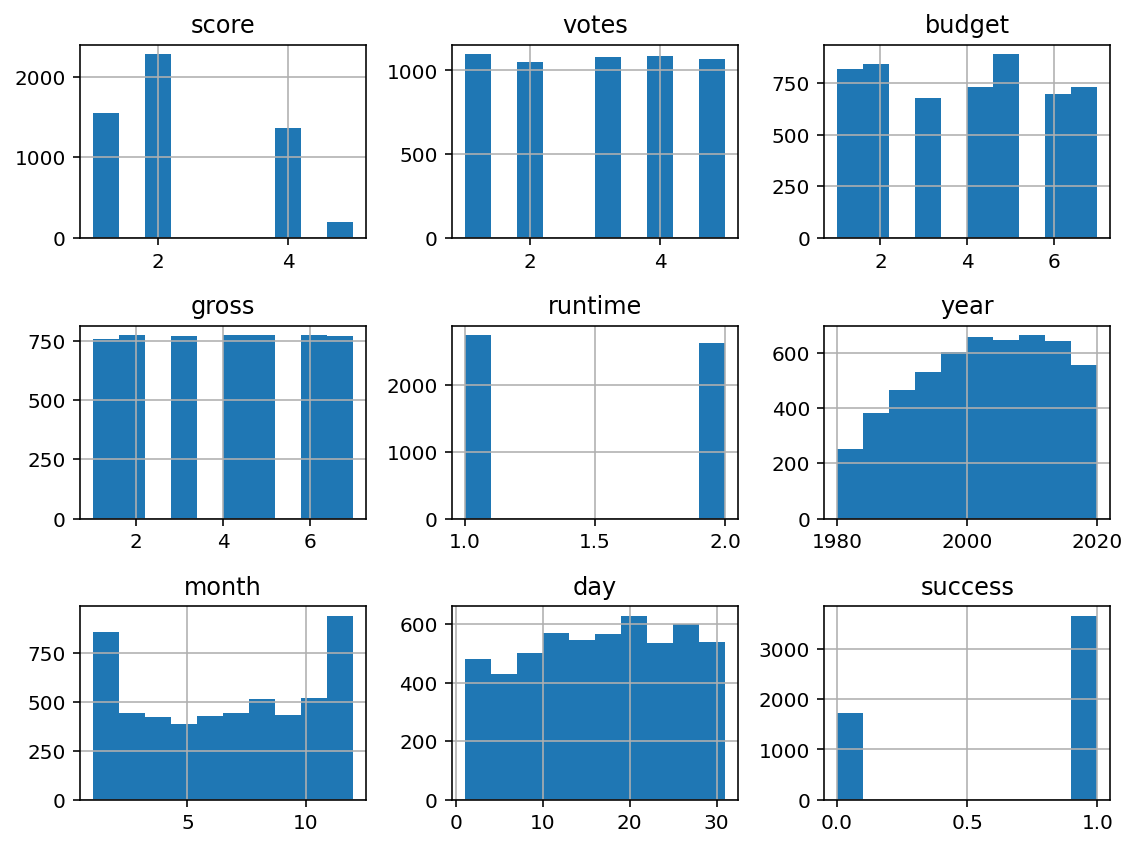

In [51]:
fig, axList = plt.subplots(3, 3, sharex=False, sharey=False)
axList = axList.flatten()
fig.set_size_inches(8, 6)

for i,ax in enumerate(axList[0:len(num_cols)]):
    df.hist(column = num_cols[i], bins = 10, ax=ax)
            
fig.tight_layout()
fig.show()

Xem xét các dữ liệu mới và vẽ biểu đồ histogram cho các cột này

C:\Users\Luc\AppData\Local\Temp\ipykernel_17952\3116577685.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


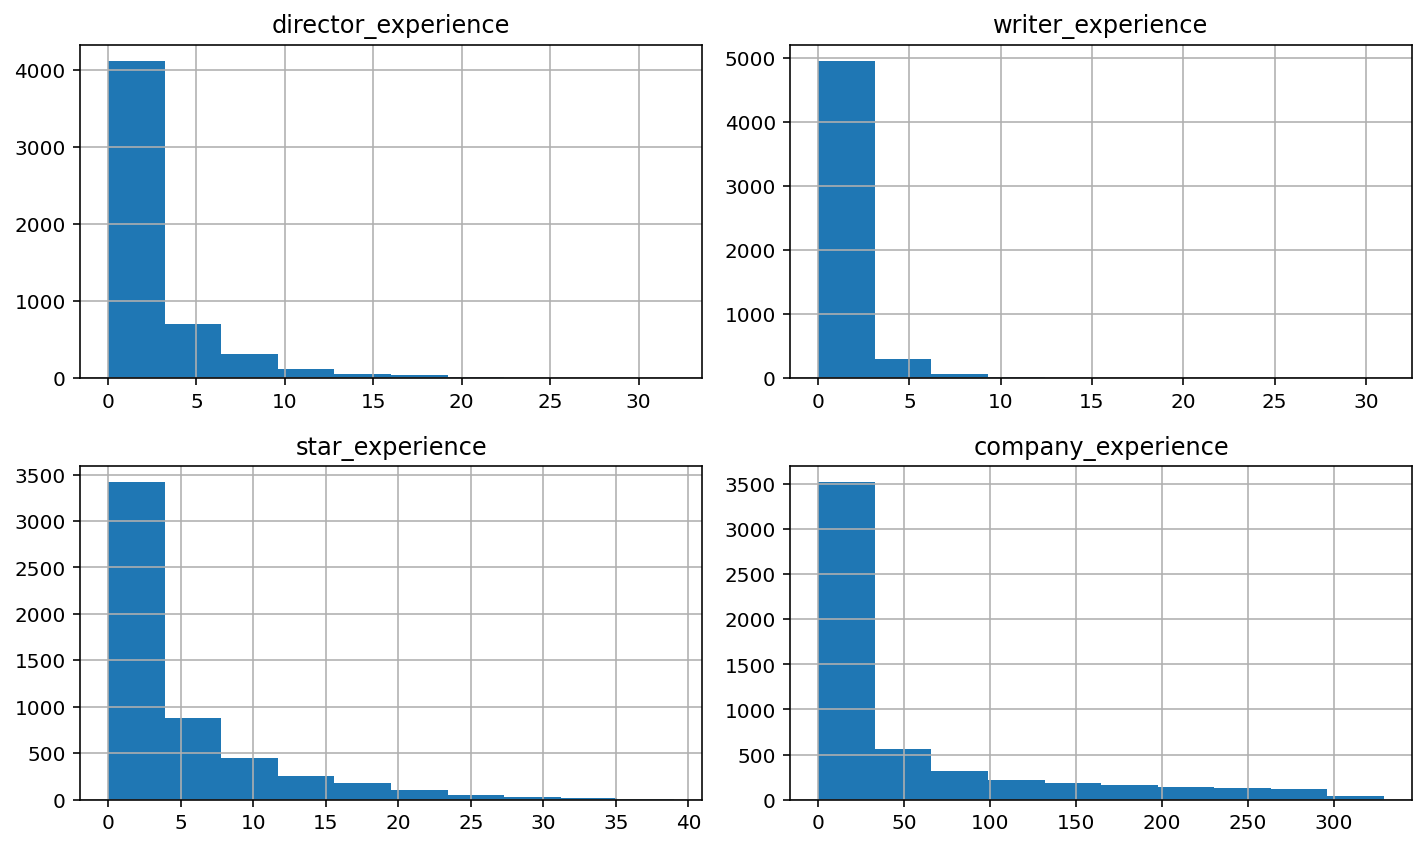

In [52]:
new_columns = ['director_experience', 'writer_experience', 'star_experience', 'company_experience']

fig, axList = plt.subplots(2, 2, sharex=False, sharey=False)
axList = axList.flatten()
fig.set_size_inches(10, 6)

for i,ax in enumerate(axList[0:len(new_columns)]):
    df.hist(column = new_columns[i], bins = 10, ax=ax)
            
fig.tight_layout()
fig.show()

In [53]:
cols = ['rating', 'genre', 'score', 'votes', 'budget', 'gross', 'runtime','director_experience', 'writer_experience', 'star_experience', 'company_experience']

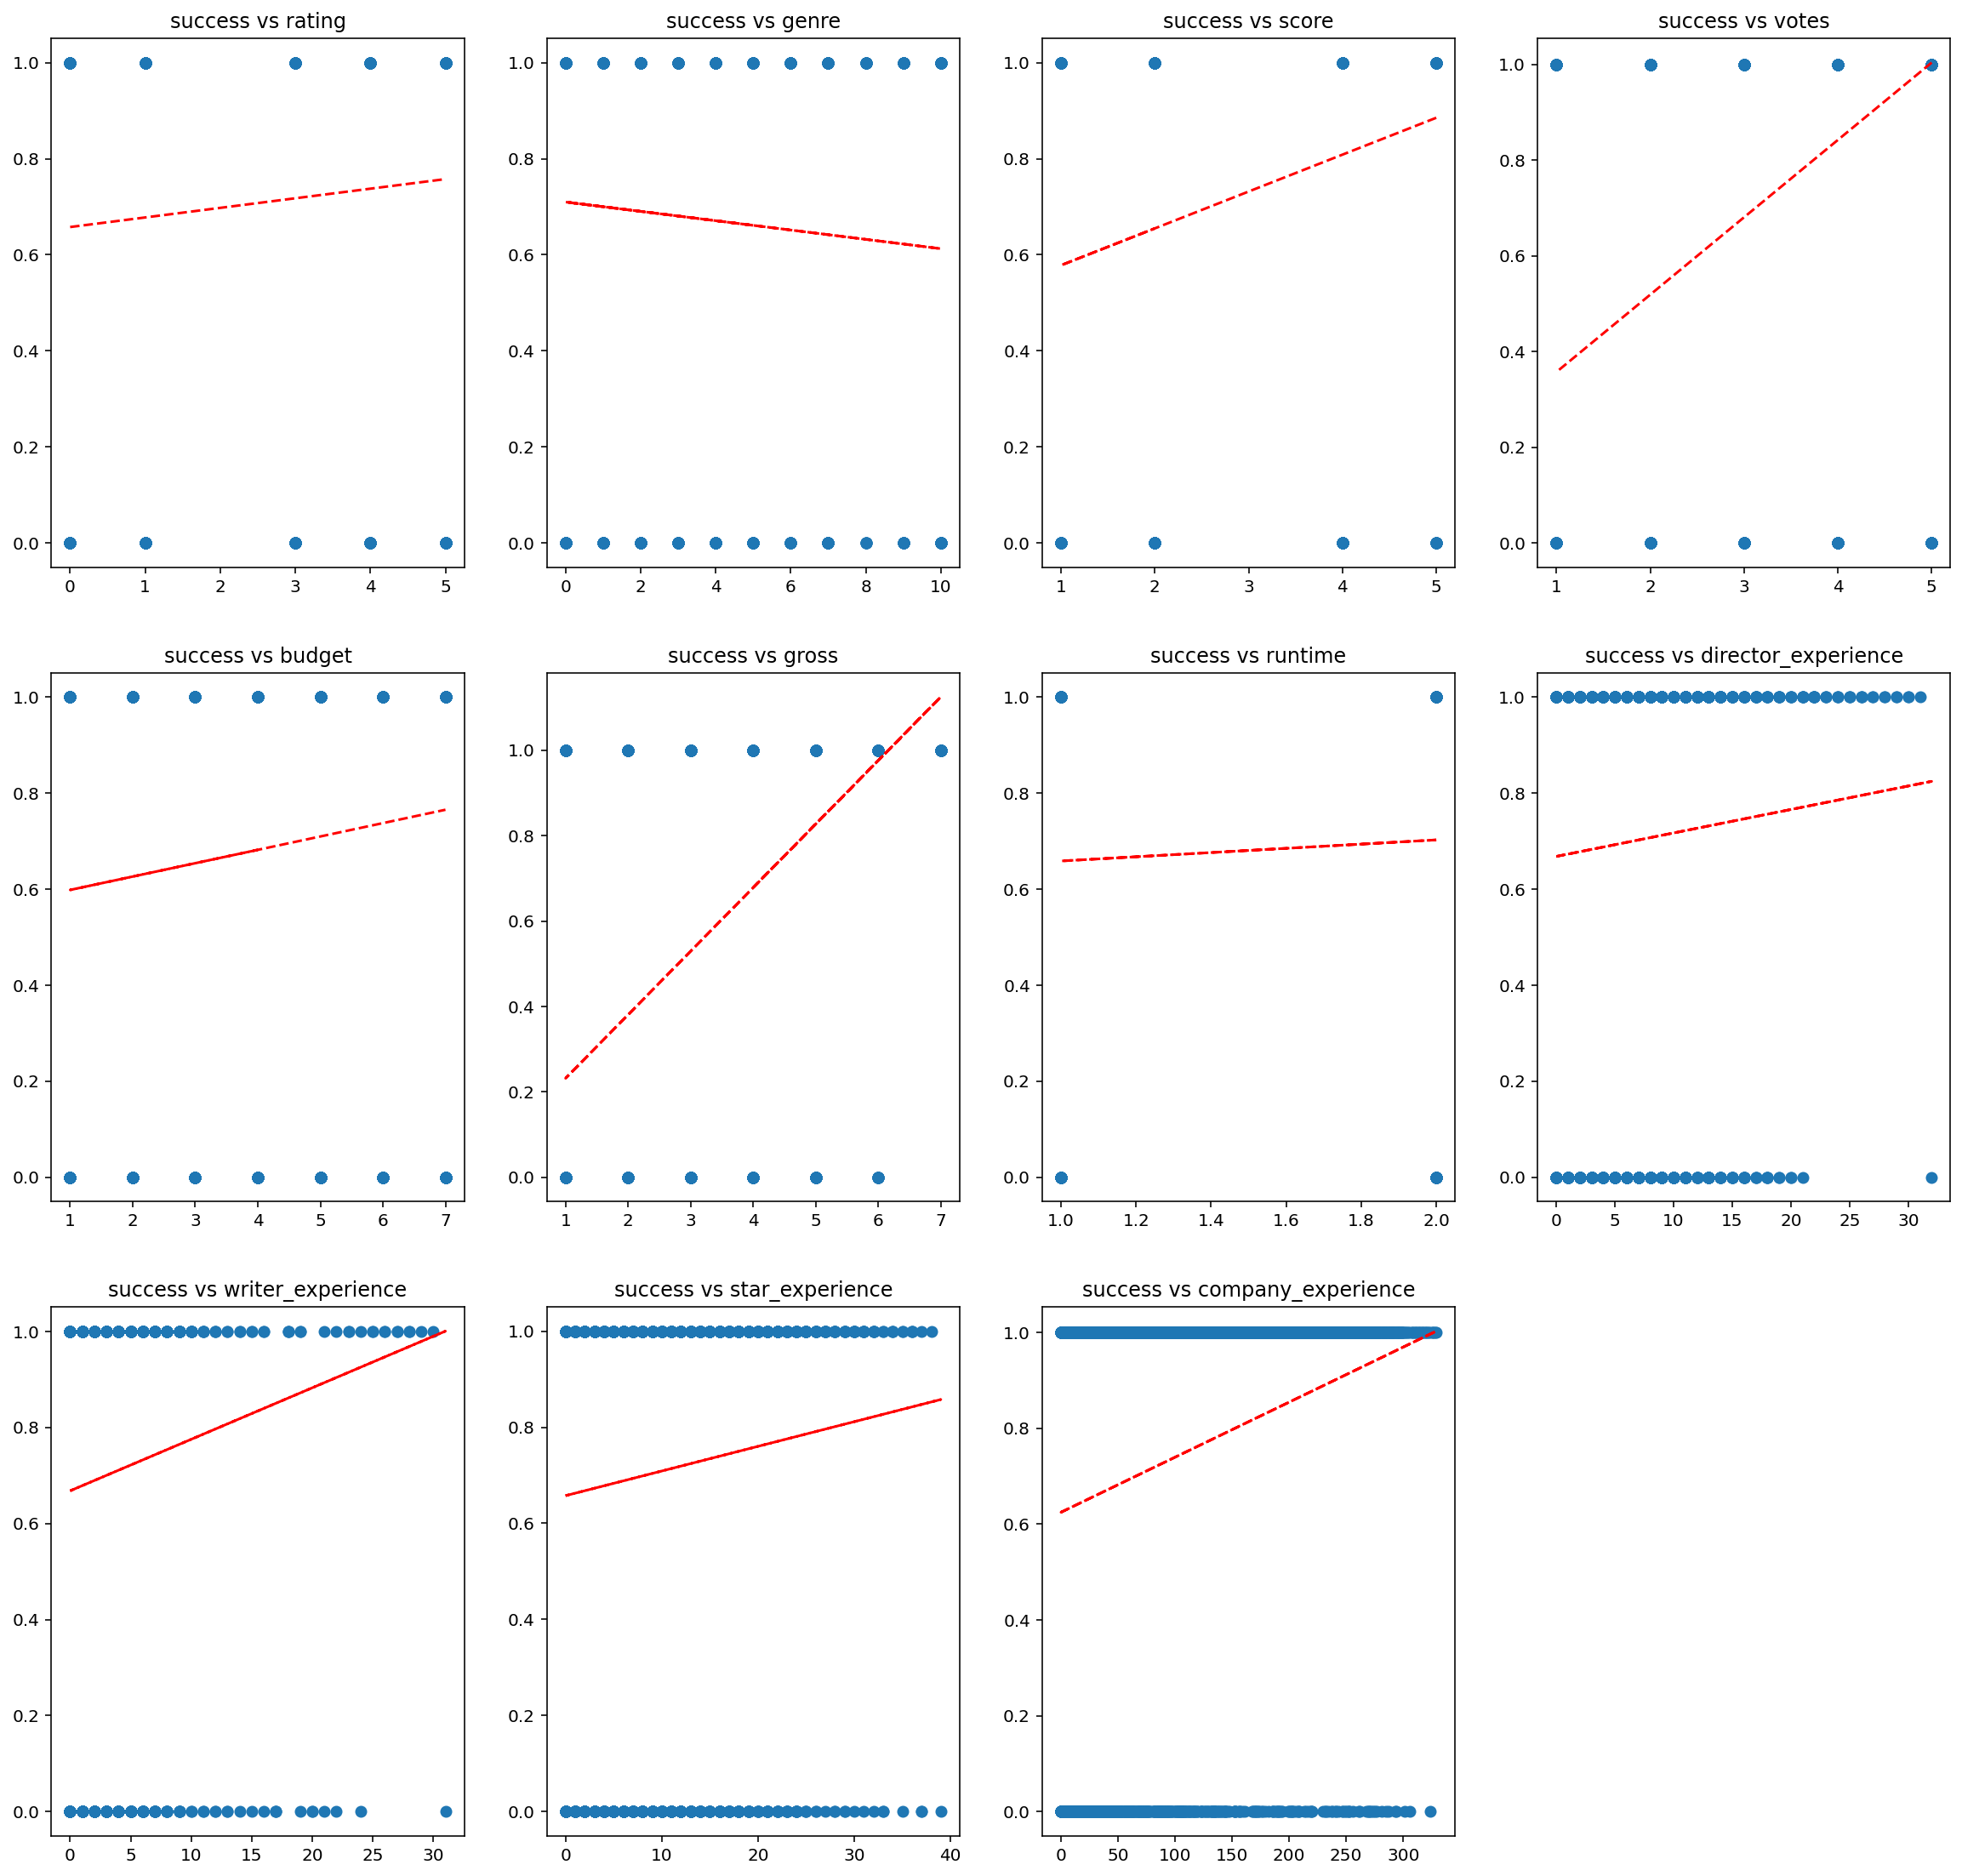

In [54]:
plt.figure(figsize=(20,40))

count = 1
for variable in cols:
  plt.subplot(6,4,count)
  x = df[variable]
  y = df["success"]
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)
  plt.scatter(x, y)
  plt.title("success vs "+ variable)
  plt.plot(x,p(x),"r--")
  count = count + 1

plt.show()

<h3>- Đánh giá mức độ ảnh hưởng của các thuộc tính điều kiện với thuộc tính quyết định: Pearson, ...

<AxesSubplot:>

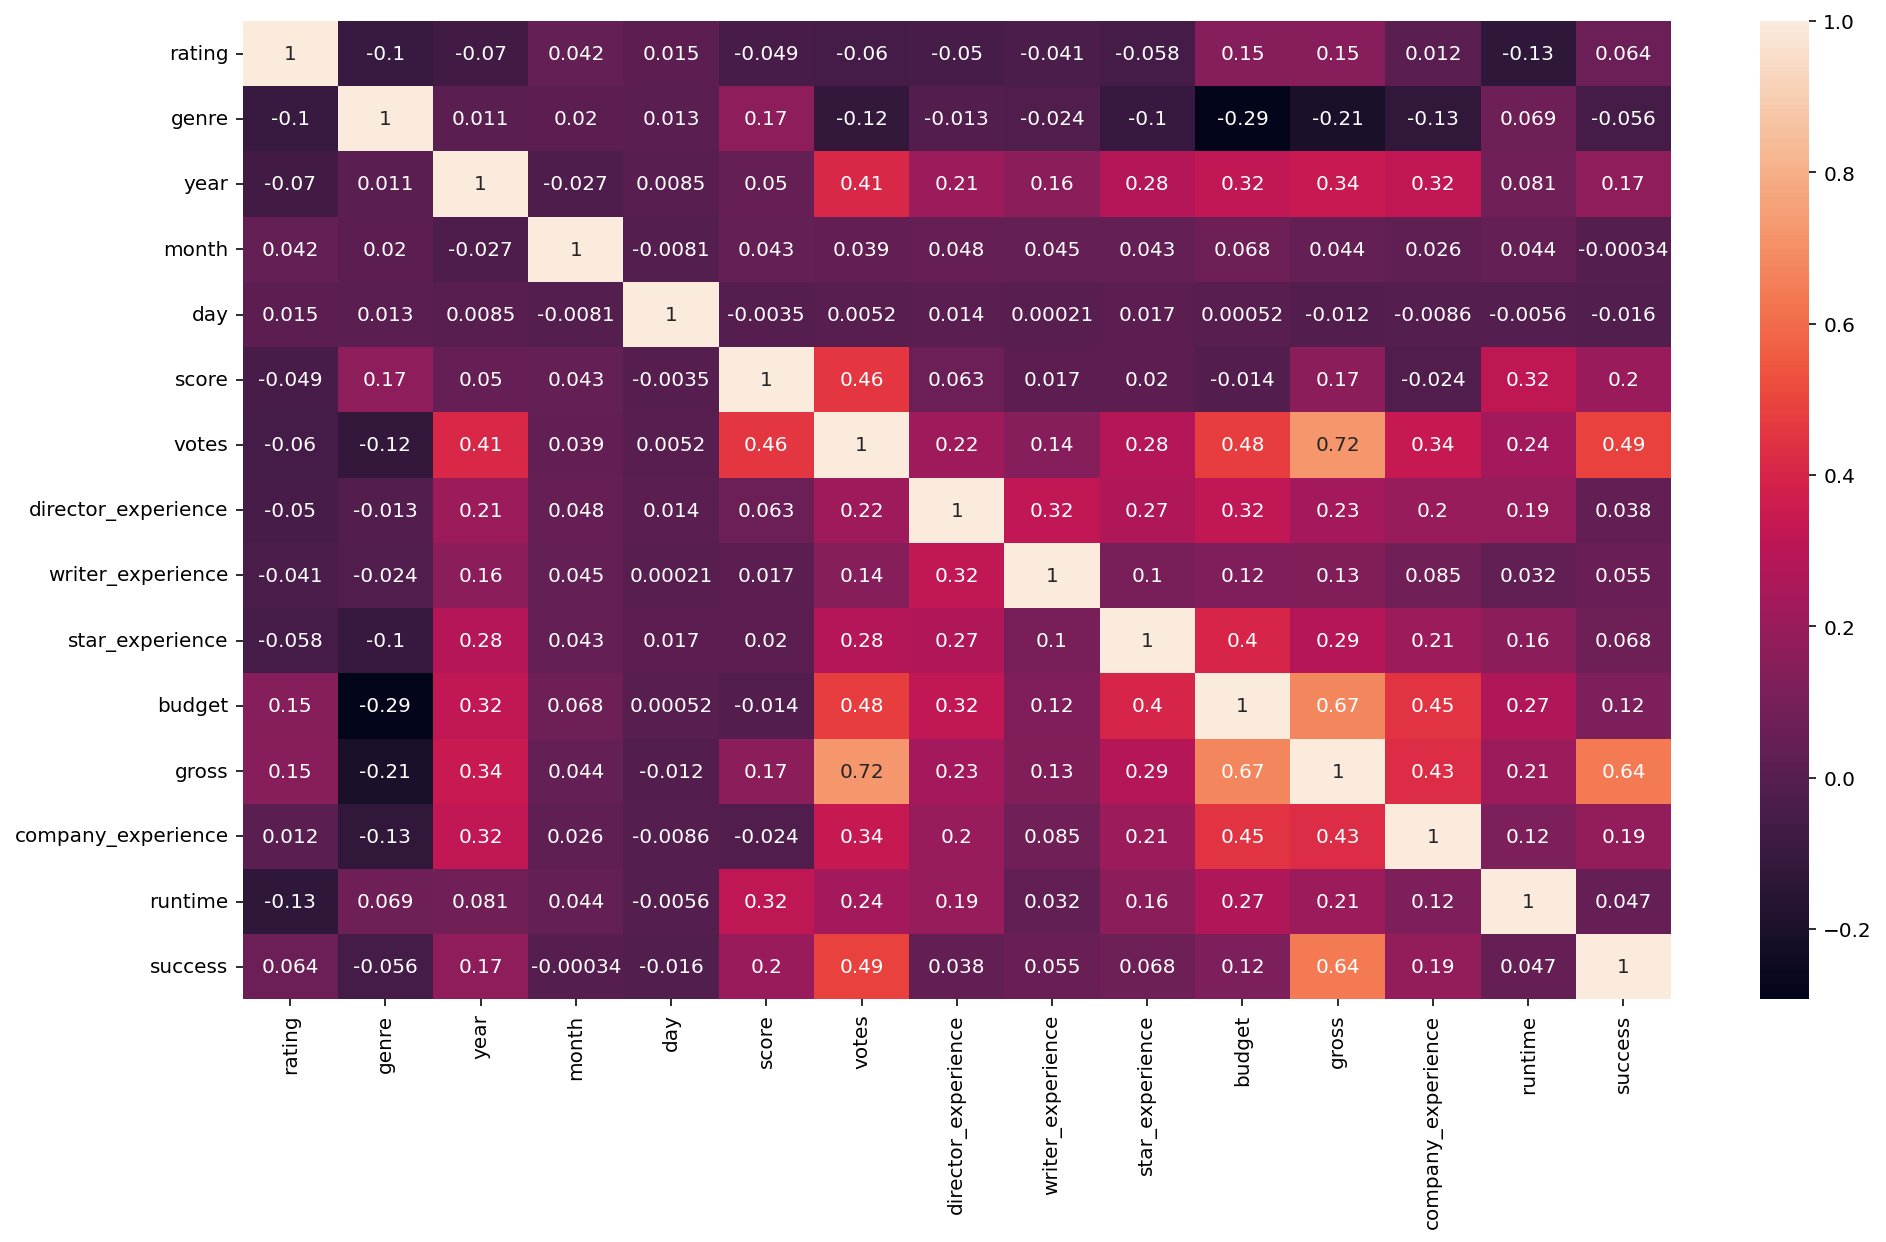

In [55]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(method='pearson'),annot=True)

<h1>4. Xây dựng model

<h3> Thuật toán ID3

<h4>- Tách các thuộc tính dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một phần chứa riêng thuộc tính quyết định.

<p>Thực hiện việc tách các cột dữ liệu vào hai biến features (chứa các thuộc tính bình thường) và biến labels (chứa riêng thuộc tính quyết định ‘success’) bằng câu lệnh sau.

In [56]:
features = df.drop('success', axis=1)
labels = df['success']

<h3>- Chuyển đổi dữ liệu số thành dữ liệu đối tượng

In [57]:
features['rating'] = features['rating'].astype(object)
features['genre'] = features['genre'].astype(object)
features['year'] = features['year'].astype(object)
features['month'] = features['month'].astype(object)
features['day'] = features['day'].astype(object)
features['score'] = features['score'].astype(object)
features['votes'] = features['votes'].astype(object)
features['director_experience'] = features['director_experience'].astype(object)
features['writer_experience'] = features['writer_experience'].astype(object)
features['star_experience'] = features['star_experience'].astype(object)
features['budget'] = features['budget'].astype(object)
features['gross'] = features['gross'].astype(object)
features['company_experience'] = features['company_experience'].astype(object)
features['runtime'] = features['runtime'].astype(object)

<h3>- Chuyển đổi dữ liệu không phải số về dạng One-hot Vector

<p>+ Xác định các thuộc tính không phải dạng số trong biến features bằng câu lệnh sau.

In [58]:
features.select_dtypes(exclude=['int64', 'float64']).columns

Index(['rating', 'genre', 'year', 'month', 'day', 'score', 'votes',
       'director_experience', 'writer_experience', 'star_experience', 'budget',
       'gross', 'company_experience', 'runtime'],
      dtype='object')

<p>+ Kết hợp câu lệnh get_dummies của thư viện pandas để chuyển đổi các cột này về dạng one-hot vector.

In [59]:
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64', 'float64']).columns)
features_onehot

c:\Users\Luc\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


rating_0.0  rating_1.0  rating_3.0  rating_4.0  rating_5.0  genre_0  \
0              1           0           0           0           0        0   
1              1           0           0           0           0        0   
2              0           0           0           1           0        1   
3              0           0           0           1           0        0   
4              1           0           0           0           0        0   
...          ...         ...         ...         ...         ...      ...   
5402           1           0           0           0           0        1   
5403           0           0           0           1           0        1   
5404           0           0           0           1           0        0   
5405           0           0           0           1           0        0   
5406           0           0           0           0           1        1   

      genre_1  genre_2  genre_3  genre_4  ...  company_experience_322.0  \
0           0        0        0        0  ...                         0   
1           1        0        0        0  ...                         0   
2           0        0        0        0  ...                         0   
3           0        0        1        0  ...                         0   
4           0        0        1        0  ...                         0   
...       ...      ...      ...      ...  ...                       ...   
5402        0        0        0        0  ...                         0   
5403        0        0        0        0  ...                         0   
5404        1        0        0        0  ...                         0   
5405        1        0        0        0  ...                         0   
5406        0        0        0        0  ...                         0   

      company_experience_323.0  company_experience_324.0  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
5402                         0                         0   
5403                         0                         0   
5404                         0                         0   
5405                         0                         0   
5406                         0                         0   

      company_experience_325.0  company_experience_326.0  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
5402                         0                         0   
5403                         0                         0   
5404                         0                         0   
5405                         0                         0   
5406                         0                         0   

      company_experience_327.0  company_experience_328.0  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
5402                         0                         0   
5403                         0                         0   
5404                         0                         1   
5405                         0                         0   
5406                         0                         0   

      company_exp

<h3>- Chia dữ liệu train và test theo tỉ lệ train:test = 70:30 với test_size = 30%

In [60]:
x_train,x_test,y_train,y_test = train_test_split(features_onehot,labels,test_size=0.3,random_state=42)

<h3>- Thêm hàm thời gian vào dữ liệu

In [61]:
from datetime import datetime, timedelta
import time

<h3>- Kiểm tra thời gian chạy của thuật toán

In [62]:
start_ID3 = time.time()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)
end_ID3 = time.time()
thoigianID3 = timedelta(seconds=round(end_ID3 - start_ID3, 4))
print(thoigianID3)

0:00:00.114800


<h3>- Chạy thuật toán bằng dòng lệnh sau

In [63]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [64]:
tree_pred = clf.predict(x_test.astype(int))

tree_score = metrics.accuracy_score(y_test.astype(int),tree_pred)
print("Accruracy:",tree_score)
print("Report:",metrics.classification_report(y_test.astype(int),tree_pred))

Accruracy: 0.8955500618046972
Report:               precision    recall  f1-score   support

           0       0.84      0.86      0.85       541
           1       0.93      0.92      0.92      1077

    accuracy                           0.90      1618
   macro avg       0.88      0.89      0.88      1618
weighted avg       0.90      0.90      0.90      1618



<h3>- Tính toán ma trận nhầm lẫn

In [65]:
tree_cm = metrics.confusion_matrix(y_test.astype(int),tree_pred)
tree_cm

array([[463,  78],
       [ 91, 986]], dtype=int64)

<h3>- Đồ thị biểu diễn cho ma trận nhầm lẫn

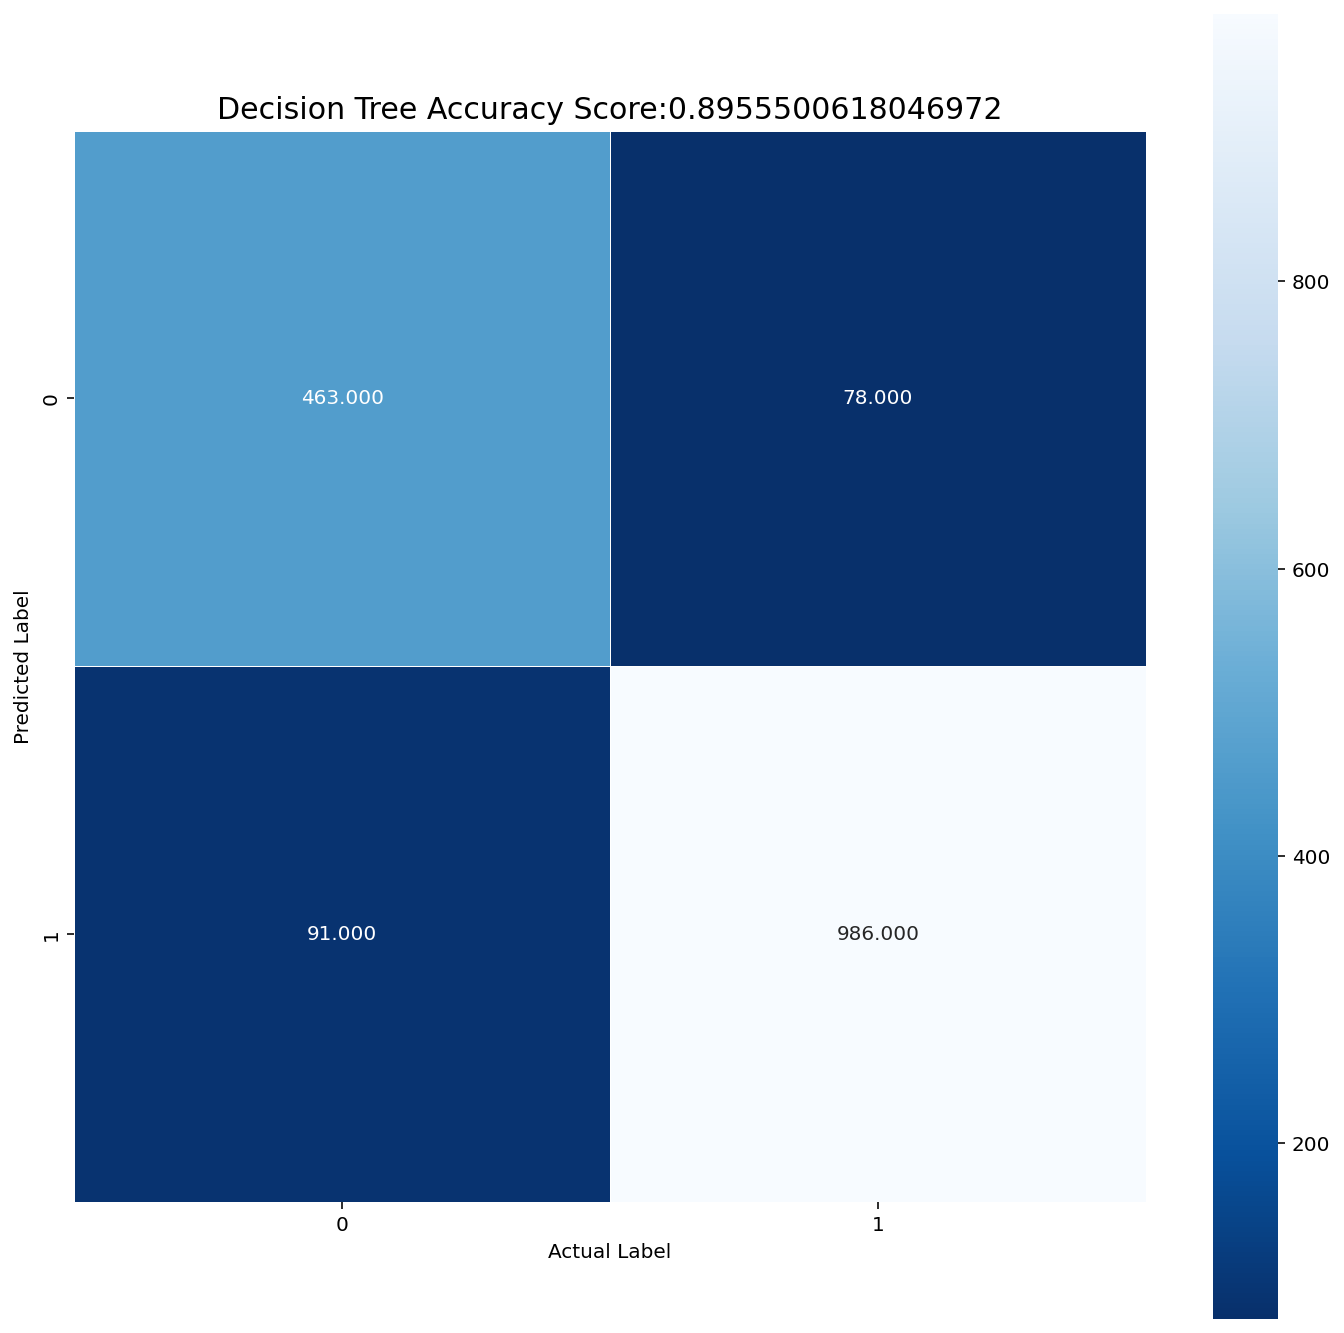

In [66]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Decision Tree Accuracy Score:{0}'.format(tree_score)
plt.title(title,size=15);

<h3>- Biểu diễn cây ID3 bằng câu lệnh sau

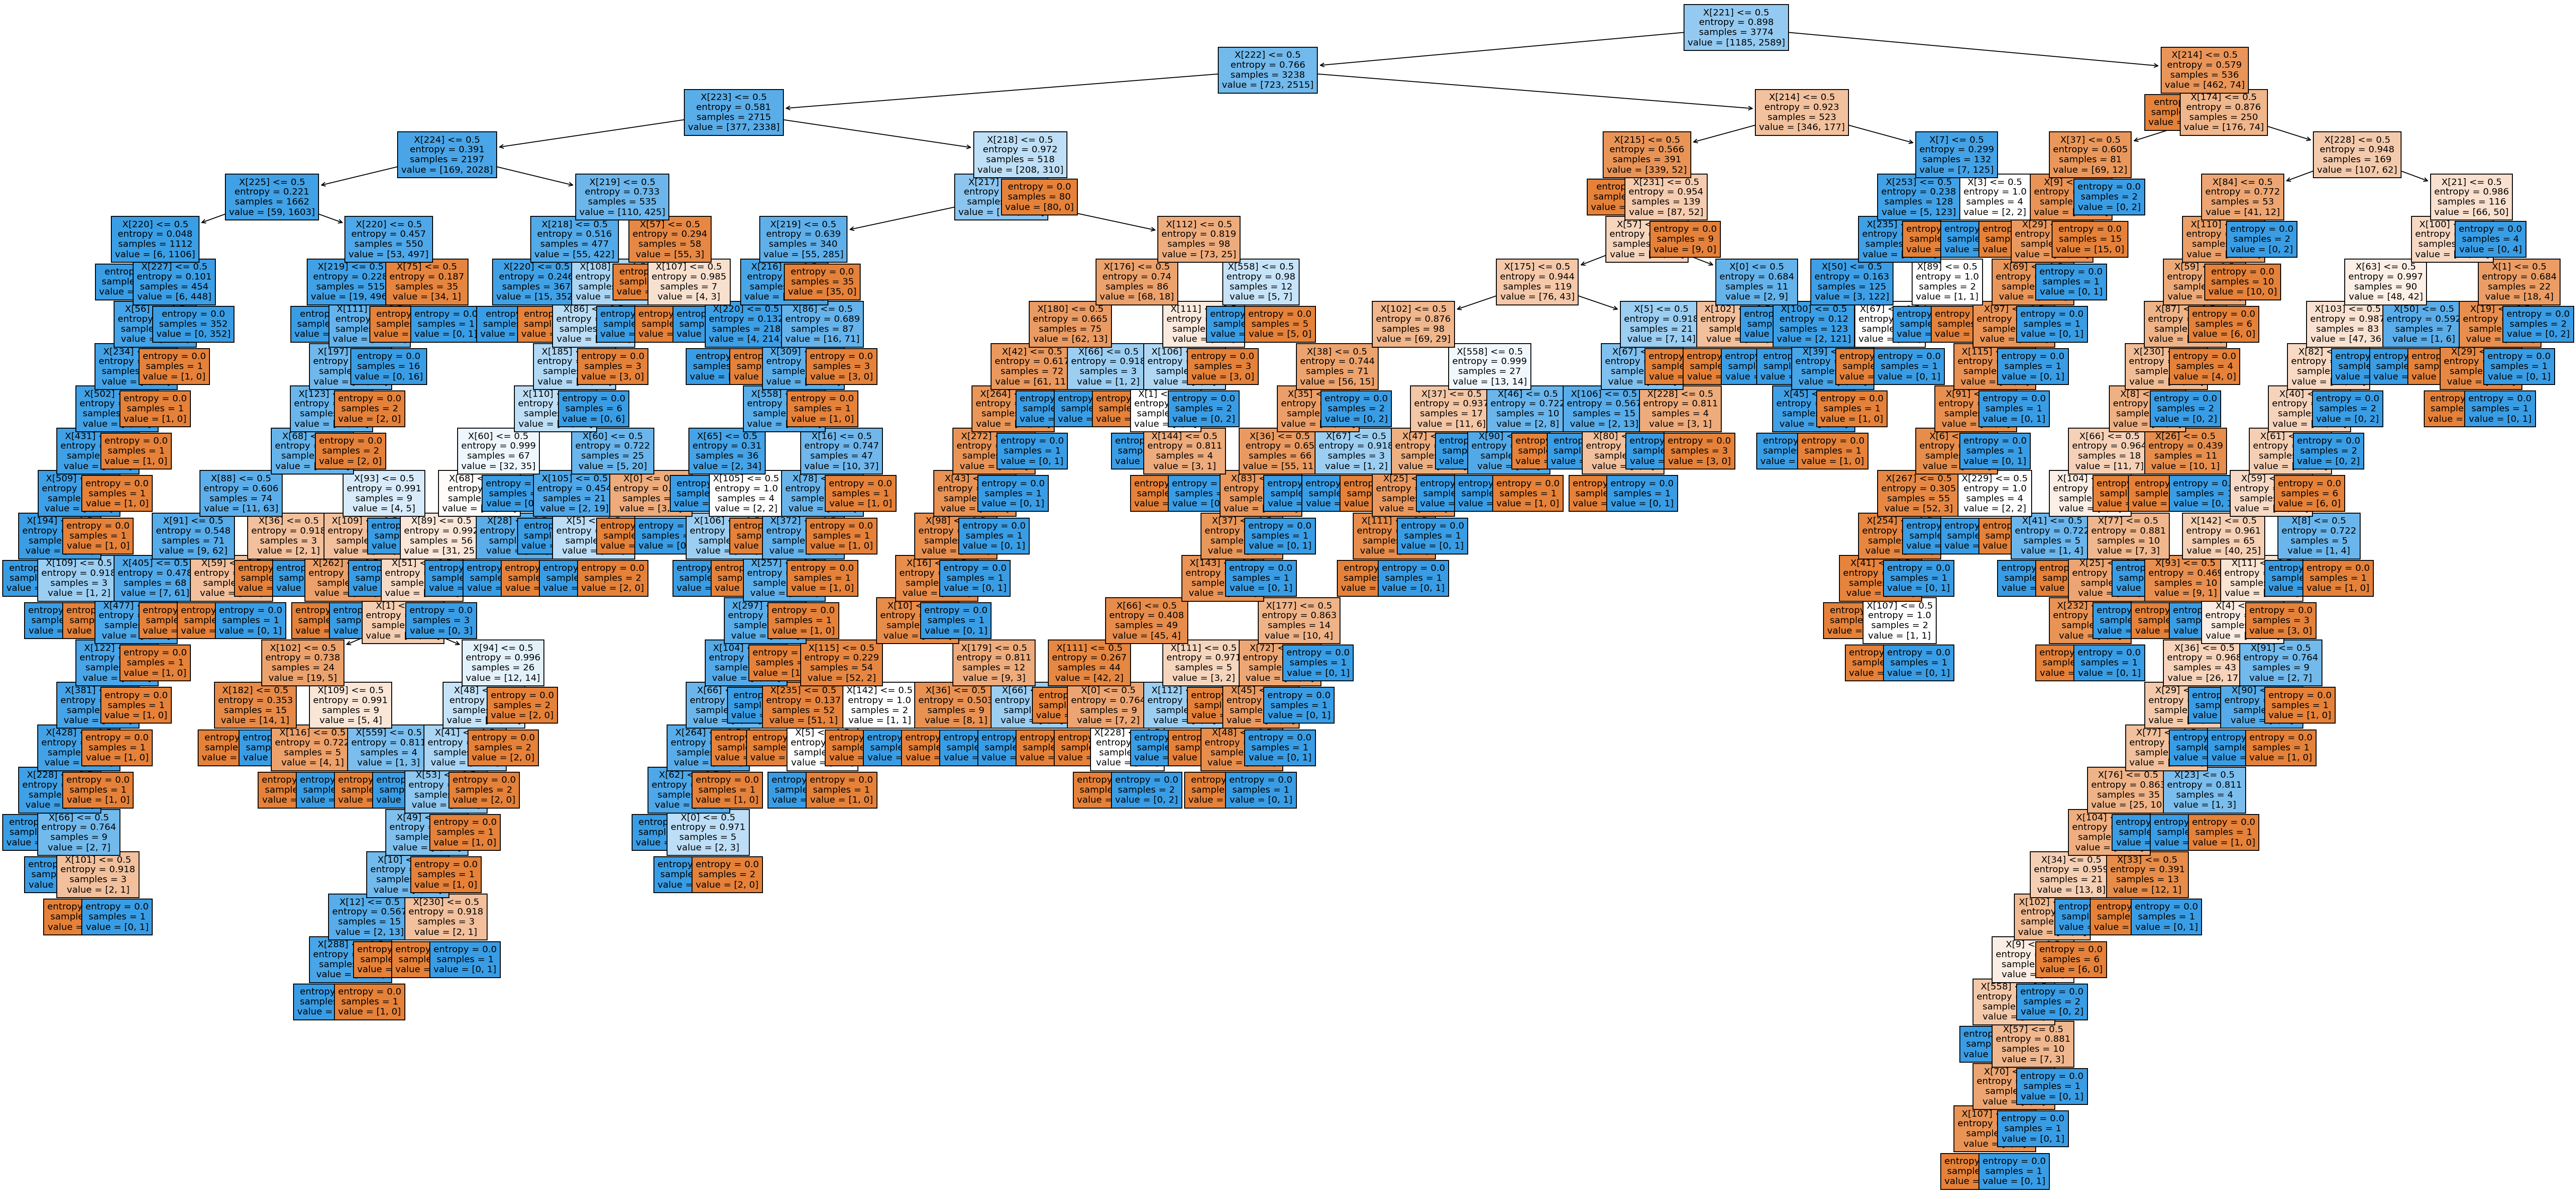

In [67]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

<h3>- Đánh giá model ROC

In [68]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

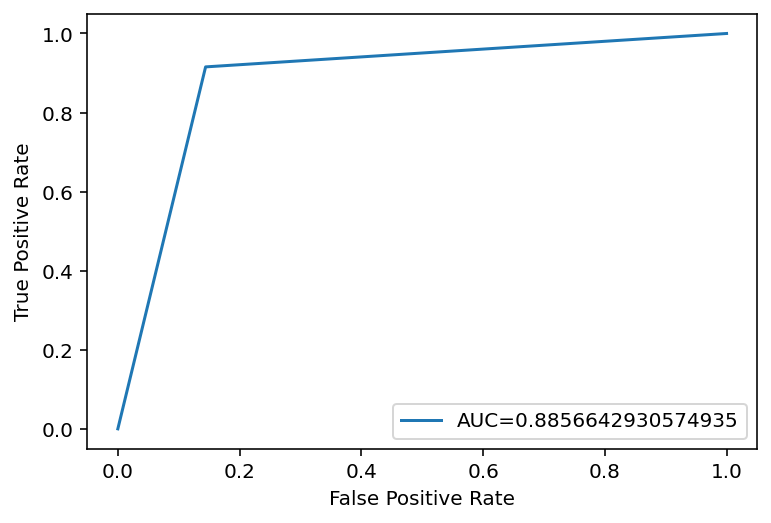

In [69]:
#define metrics
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

<h3>Thuật toán Naive-Bayes

<h3>- Tách các thuộc tính dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một phần chứa riêng thuộc tính quyết định.

<p>Thực hiện việc tách các cột dữ liệu vào hai biến features (chứa các thuộc tính bình thường) và biến labels (chứa riêng thuộc tính quyết định ‘success’) bằng câu lệnh sau.

In [70]:
features = df.drop('success', axis=1)
labels = df['success']

<h3>- Chuyển đổi dữ liệu số thành dữ liệu đối tượng

In [71]:
features['rating'] = features['rating'].astype(object)
features['genre'] = features['genre'].astype(object)
features['year'] = features['year'].astype(object)
features['month'] = features['month'].astype(object)
features['day'] = features['day'].astype(object)
features['score'] = features['score'].astype(object)
features['votes'] = features['votes'].astype(object)
features['director_experience'] = features['director_experience'].astype(object)
features['writer_experience'] = features['writer_experience'].astype(object)
features['star_experience'] = features['star_experience'].astype(object)
features['budget'] = features['budget'].astype(object)
features['gross'] = features['gross'].astype(object)
features['company_experience'] = features['company_experience'].astype(object)
features['runtime'] = features['runtime'].astype(object)

<h3>- Chuyển đổi dữ liệu không phải số về dạng số bằng One-hot Vector

In [72]:
features.select_dtypes(exclude=['int64']).columns

Index(['rating', 'genre', 'year', 'month', 'day', 'score', 'votes',
       'director_experience', 'writer_experience', 'star_experience', 'budget',
       'gross', 'company_experience', 'runtime'],
      dtype='object')

In [73]:
feature_onehot = pd.get_dummies(features,columns=features.select_dtypes(exclude=['int64']).columns)
feature_onehot

c:\Users\Luc\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


rating_0.0  rating_1.0  rating_3.0  rating_4.0  rating_5.0  genre_0  \
0              1           0           0           0           0        0   
1              1           0           0           0           0        0   
2              0           0           0           1           0        1   
3              0           0           0           1           0        0   
4              1           0           0           0           0        0   
...          ...         ...         ...         ...         ...      ...   
5402           1           0           0           0           0        1   
5403           0           0           0           1           0        1   
5404           0           0           0           1           0        0   
5405           0           0           0           1           0        0   
5406           0           0           0           0           1        1   

      genre_1  genre_2  genre_3  genre_4  ...  company_experience_322.0  \
0           0        0        0        0  ...                         0   
1           1        0        0        0  ...                         0   
2           0        0        0        0  ...                         0   
3           0        0        1        0  ...                         0   
4           0        0        1        0  ...                         0   
...       ...      ...      ...      ...  ...                       ...   
5402        0        0        0        0  ...                         0   
5403        0        0        0        0  ...                         0   
5404        1        0        0        0  ...                         0   
5405        1        0        0        0  ...                         0   
5406        0        0        0        0  ...                         0   

      company_experience_323.0  company_experience_324.0  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
5402                         0                         0   
5403                         0                         0   
5404                         0                         0   
5405                         0                         0   
5406                         0                         0   

      company_experience_325.0  company_experience_326.0  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
5402                         0                         0   
5403                         0                         0   
5404                         0                         0   
5405                         0                         0   
5406                         0                         0   

      company_experience_327.0  company_experience_328.0  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
5402                         0                         0   
5403                         0                         0   
5404                         0                         1   
5405                         0                         0   
5406                         0                         0   

      company_exp

<h3>- Chia dữ liệu train và test theo tỉ lệ train:test = 70:30 với test_size = 30%

In [74]:
x_train,x_test,y_train,y_test = train_test_split(feature_onehot, labels,test_size=0.3,random_state=42)

<h3>- Kiểm tra thời gian chạy của thuật toán

In [75]:
start_Bayes = time.time()
gnb = GaussianNB()
gnb.fit(x_train,y_train)
end_Bayes = time.time()
thoigianBayes = timedelta(seconds=round(end_Bayes-start_Bayes,4))
print(thoigianBayes)

0:00:00.063800


<h3>- Chạy thuật toán bằng dòng lệnh sau

In [76]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [77]:
bayes_pred = gnb.predict(x_test)

bayes_score = metrics.accuracy_score(y_test,bayes_pred)
print("Độ chính xác: ",bayes_score)
print("Report: ",metrics.classification_report(y_test,bayes_pred))

Độ chính xác:  0.5080346106304079
Report:                precision    recall  f1-score   support

           0       0.40      0.93      0.56       541
           1       0.90      0.30      0.44      1077

    accuracy                           0.51      1618
   macro avg       0.65      0.61      0.50      1618
weighted avg       0.73      0.51      0.48      1618



<h3>- Tính toán ma trận nhầm lẫn

In [78]:
bayes_cm = metrics.confusion_matrix(y_test.astype(int),bayes_pred)
bayes_cm

array([[504,  37],
       [759, 318]], dtype=int64)

<h3>- Đồ thị biểu diễn cho ma trận nhầm lẫn

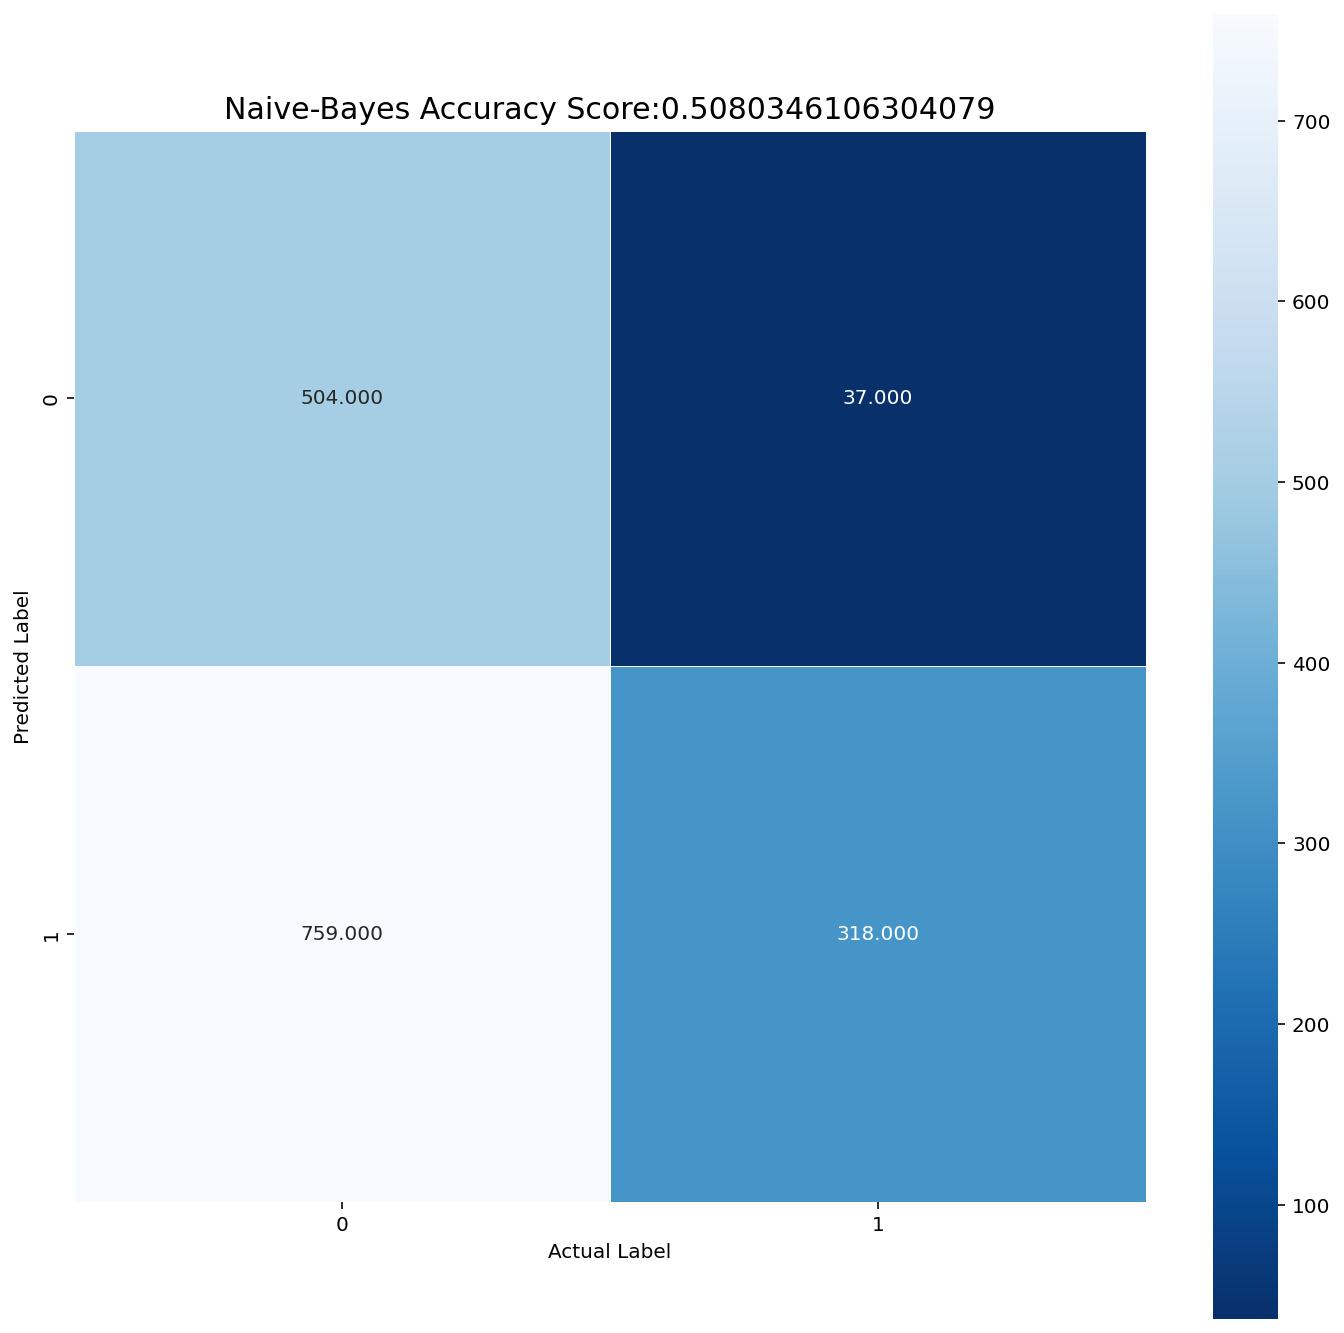

In [79]:
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Naive-Bayes Accuracy Score:{0}'.format(bayes_score)
plt.title(title,size=15);

<h3>- Đánh giá model ROC

In [80]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

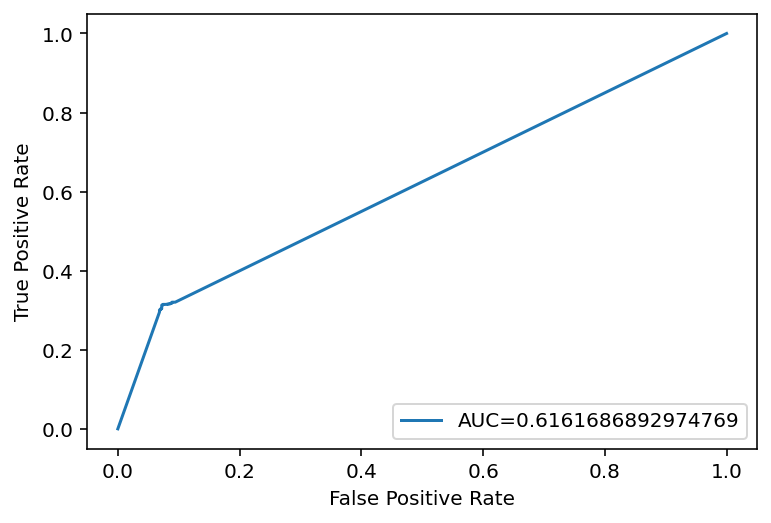

In [81]:
#define metrics
y_pred_proba = gnb.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


<h3>Thuật toán SVM

<h3>- Tách các thuộc tính dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một phần chứa riêng thuộc tính quyết định.

<p>Thực hiện việc tách các cột dữ liệu vào hai biến features (chứa các thuộc tính bình thường) và biến labels (chứa riêng thuộc tính quyết định ‘success’) bằng câu lệnh sau.

In [82]:
features = df.drop('success', axis=1)
labels = df['success']

<h3>- Chia dữ liệu train và test theo tỉ lệ train:test = 70:30 với test_size = 30%

In [83]:
x_train, x_test, y_train, y_test= train_test_split(features, labels, test_size= 0.3, random_state=0)  

<h3>- Kiểm tra thời gian chạy của thuật toán

In [84]:
start_SVM = time.time()
classifier = SVC(kernel='linear', random_state=0, probability=True)  
classifier.fit(x_train, y_train)
end_SVM = time.time()
thoigianSVM = timedelta(seconds=round(end_SVM-start_SVM,4))
print(thoigianSVM)

0:00:07.303100


<h3>- Chạy thuật toán bằng dòng lệnh sau

In [85]:
classifier = SVC(kernel='linear', random_state=0, probability=True)  
classifier.fit(x_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [86]:
SVM_pred = classifier.predict(x_test)

svm_score = metrics.accuracy_score(y_test,SVM_pred)
print("Độ chính xác: ",svm_score)
print("Report: ",metrics.classification_report(y_test,SVM_pred))

Độ chính xác:  0.9363411619283065
Report:                precision    recall  f1-score   support

           0       0.88      0.93      0.90       518
           1       0.96      0.94      0.95      1100

    accuracy                           0.94      1618
   macro avg       0.92      0.93      0.93      1618
weighted avg       0.94      0.94      0.94      1618



<h3>- Tính toán ma trận nhầm lẫn

In [87]:
svm_cm = metrics.confusion_matrix(y_test.astype(int),SVM_pred)
svm_cm

array([[ 480,   38],
       [  65, 1035]], dtype=int64)

<h3>- Đồ thị biểu diễn cho ma trận nhầm lẫn

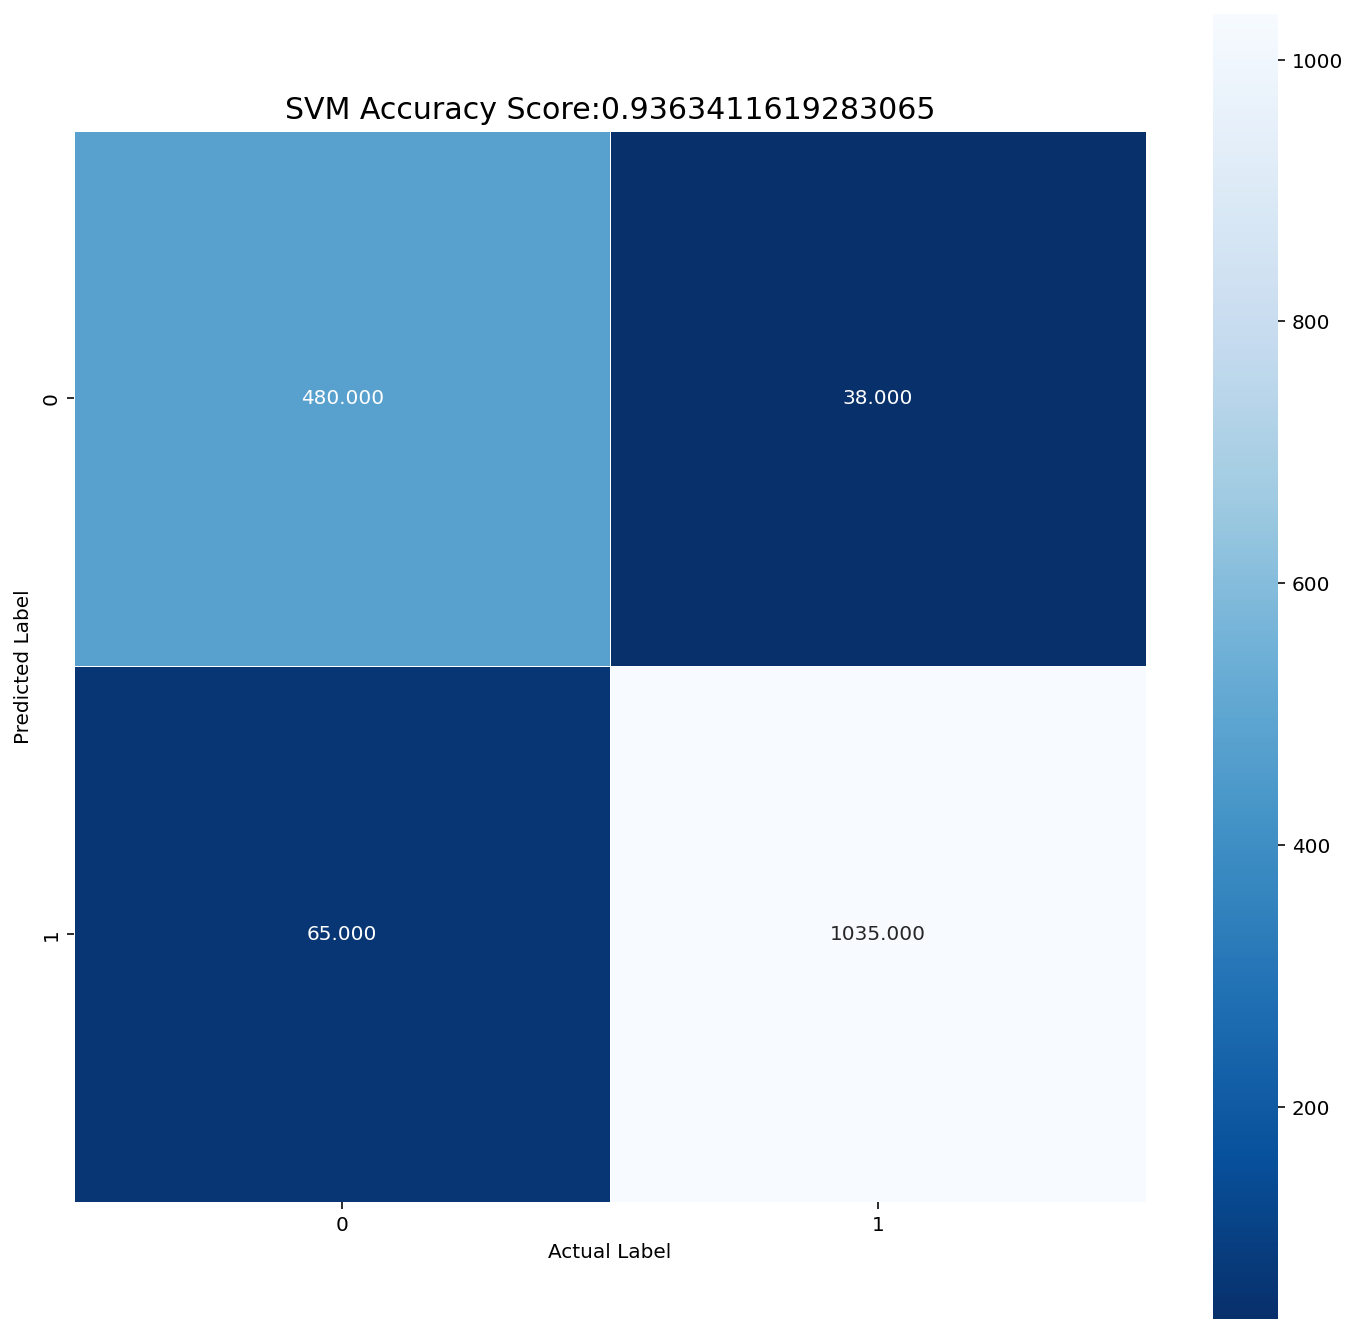

In [88]:
plt.figure(figsize=(12,12))
sns.heatmap(svm_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='SVM Accuracy Score:{0}'.format(svm_score)
plt.title(title,size=15);

<h3>- Đánh giá model ROC

In [89]:
classifier = SVC(kernel='linear', random_state=0, probability=True)  
classifier.fit(x_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

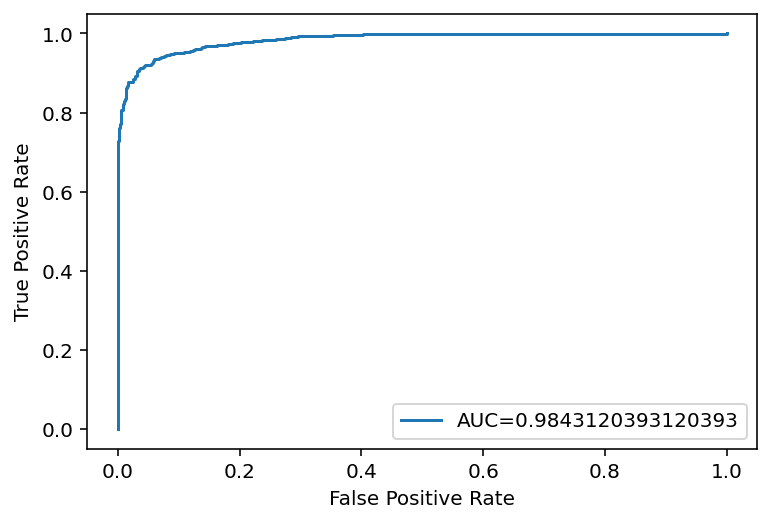

In [90]:
#define metrics
y_pred_proba = classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

<h1>Đánh giá model sử dụng phương pháp k-fold cross-validation cho model chính

In [91]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [92]:
#use k-fold CV to evaluate model
scores = cross_val_score(classifier, features, labels, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))

0.07103174603174603

<h1>Đánh giá về thời gian chạy của 3 thuật toán

c:\Users\Luc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Thời gian chạy của 3 thuật toán')

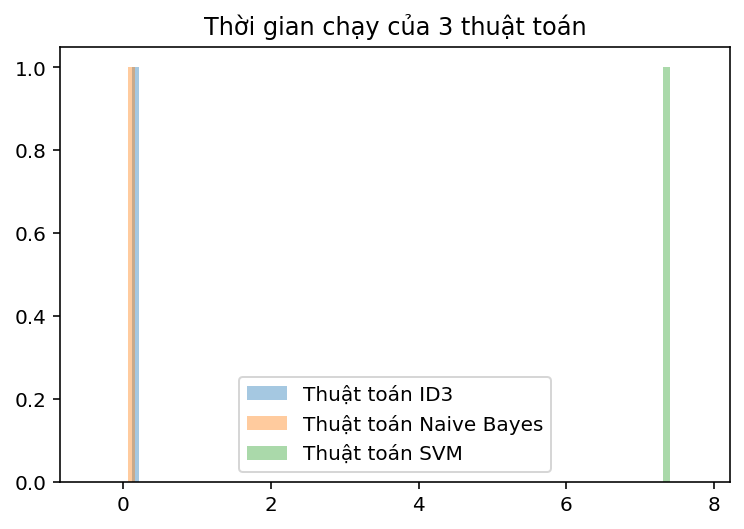

In [93]:
ax = sns.distplot(end_ID3-start_ID3, bins=10, label='Thuật toán ID3', kde=False)
ax = sns.distplot(end_Bayes-start_Bayes, bins=10, label='Thuật toán Naive Bayes', kde=False)
ax = sns.distplot(end_SVM-start_SVM, bins=10, label='Thuật toán SVM', kde=False)
ax.legend()
ax.set_title('Thời gian chạy của 3 thuật toán')

<h1>Đánh giá về độ chính xác của 3 thuật toán

Text(0.5, 1.0, 'Độ chính xác của 3 thuật toán')

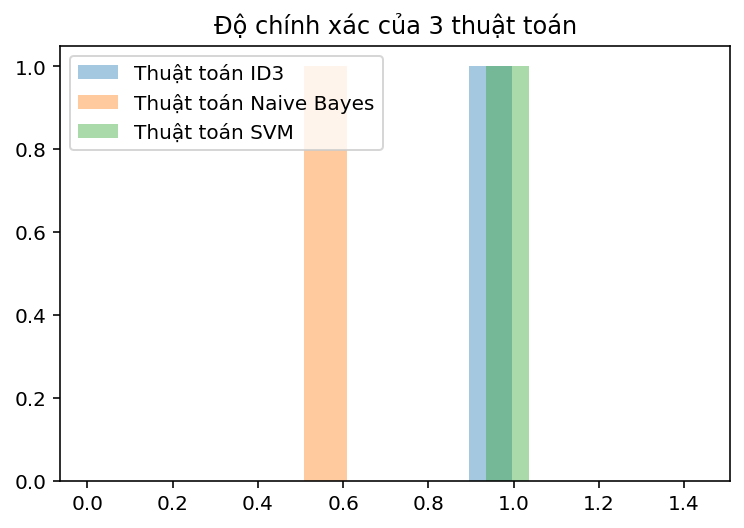

In [94]:
ax = sns.distplot(tree_score, bins=10, label='Thuật toán ID3', kde=False)
ax = sns.distplot(bayes_score, bins=10, label='Thuật toán Naive Bayes', kde=False)
ax = sns.distplot(svm_score, bins=10, label='Thuật toán SVM', kde=False)
ax.legend()
ax.set_title('Độ chính xác của 3 thuật toán')

<h1>Dự báo khả năng thành công của bộ phim

In [95]:
dudoan = x_test.head(10)

In [96]:
dudoan

rating  genre  year  month  day  score  votes  director_experience  \
5255     1.0      0  2018      7   13      1      4                  3.0   
4549     0.0      1  2014      5   30      4      5                  6.0   
3797     0.0      0  2009      8   28      1      4                  3.0   
143      4.0      4  1982      3    5      4      2                  0.0   
2376     0.0      5  2000      3   24      2      1                  1.0   
3648     1.0      0  2008      2   22      2      4                  0.0   
4638     0.0      0  2014      1   30      4      3                  2.0   
1859     0.0      0  1997      4    4      1      2                  0.0   
4858     1.0      0  2016     11    4      4      5                  4.0   
4882     1.0      1  2016     11   18      4      5                  4.0   

      writer_experience  star_experience  budget  gross  company_experience  \
5255                1.0             18.0       7      7                 4.0   
4549                3.0              0.0       2      4                 0.0   
3797                0.0              0.0       5      6               121.0   
143                 0.0              0.0       2      2                 1.0   
2376                0.0              1.0       2      1                11.0   
3648                0.0             13.0       5      6               201.0   
4638                2.0              1.0       4      2                 1.0   
1859                2.0             14.0       5      2                 1.0   
4858                2.0              2.0       7      7                 6.0   
4882                3.0              2.0       7      7                 1.0   

      runtime  
5255        1  
4549        2  
3797        1  
143         2  
2376        1  
3648        1  
4638        2  
1859        1  
4858        2  
4882        2

In [97]:
pred = classifier.predict(dudoan)
for var in pred:
    if (var == 0): print("not_success")
    if (var == 1): print("success")

success
success
success
not_success
not_success
success
not_success
not_success
success
success
